In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# from collections import defaultdict


# =Directories=

INPUT_DIR = 'in'
OUTPUT_DIR = 'out'
PLOT_DIR = f'{OUTPUT_DIR}/plots'
PLOT_PREDICTIONS_DIR = f'{OUTPUT_DIR}/plots/predictions'

os.makedirs(INPUT_DIR, exist_ok=True)
os.makedirs(OUTPUT_DIR, exist_ok=True)
os.makedirs(PLOT_DIR, exist_ok=True)
os.makedirs(PLOT_PREDICTIONS_DIR, exist_ok=True)

In [2]:
df = pd.read_csv(f"{INPUT_DIR}/43311-0002_de.csv",  delimiter=';')


# Fill missing Jahr & Monat
df["Jahr"].fillna(method="ffill", inplace=True)
df["Monat"].fillna(method="ffill", inplace=True)
df["Jahr"] = df["Jahr"].astype(int)

# Convert production columns to numeric
df["Elektrizitätserzeugung (brutto)"] = pd.to_numeric(df["Elektrizitätserzeugung (brutto)"], errors='coerce')
df["Elektrizitätserzeugung (netto)"] = pd.to_numeric(df["Elektrizitätserzeugung (netto)"], errors='coerce')

# Group by Jahr and Typ 
strommix_df = df.groupby(["Jahr", "Typ"])[["Elektrizitätserzeugung (netto)"]].sum().reset_index()

strommix_df.head(20)

C:\Users\sulta\AppData\Local\Temp\ipykernel_7648\2573067558.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Jahr"].fillna(method="ffill", inplace=True)
C:\Users\sulta\AppData\Local\Temp\ipykernel_7648\2573067558.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Jahr"].fillna(method="ffill", inplace=True)
C:\Users\sulta\AppData\Local\Temp\ipykernel_7648\2573067558.py:6: FutureWarning: A value is trying to be set on a copy of a

,Jahr,Typ,Elektrizitätserzeugung (netto)
0,2002,"Abfall (Hausmüll, Industrie)",2926818.0
1,2002,"Abfall (Hausmüll, Siedlungsabfälle)",0.0
2,2002,Abfall (Industrie),0.0
3,2002,Andere Speicher,0.0
4,2002,Biogas,30547.0
5,2002,Biomethan (Bioerdgas),0.0
6,2002,Braunkohlenbriketts,41935.0
7,2002,Braunkohlenkoks,0.0
8,2002,Deponiegas,110551.0
9,2002,Dieselkraftstoff,6381.0


In [3]:
import pandas as pd

# CSV einlesen
df_saldo = pd.read_csv(f"{INPUT_DIR}/43312-0002_de_flat.csv", sep=";")

# Filter: Deutschland insgesamt + Insgesamt
df_saldo_filtered = df_saldo[
    (df_saldo["2_variable_attribute_label"] == "Deutschland") &
    (df_saldo["3_variable_attribute_label"] == "Insgesamt") 
]

# Parse numbers
df_saldo_filtered["Jahr"] = df_saldo_filtered["time"].astype(int)
df_saldo_filtered["value"] = pd.to_numeric(
    df_saldo_filtered["value"]
    .astype(str)
    .str.replace(".", "", regex=False)
    .str.replace(",", ".", regex=False),
    errors="coerce"
)

# Group: Jahr + Typ und Werte summieren
grouped = (
    df_saldo_filtered
    .groupby(["Jahr", "value_variable_label"])["value"]
    .sum()
    .reset_index()
)

grouped = grouped.rename(columns={
    "value_variable_label": "Typ",
    "value": "Elektrizitätserzeugung (netto)"
})

# Timeframe: 2002–2024
austauschsaldo = grouped[(grouped["Jahr"] >= 2002) & (grouped["Jahr"] <= 2024)]

# austauschsaldo.head(20)

# Concat export data
strommix_gesamt = pd.concat([strommix_df, austauschsaldo], ignore_index=True)

# Test output
strommix_gesamt[strommix_gesamt["Jahr"] == 2022].sort_values("Jahr")

C:\Users\sulta\AppData\Local\Temp\ipykernel_7648\4044212106.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_saldo_filtered["Jahr"] = df_saldo_filtered["time"].astype(int)
C:\Users\sulta\AppData\Local\Temp\ipykernel_7648\4044212106.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_saldo_filtered["value"] = pd.to_numeric(


,Jahr,Typ,Elektrizitätserzeugung (netto)
1040,2022,"Abfall (Hausmüll, Industrie)",0.0
1069,2022,Pumpspeicher mit natürlichem Zufluss,458795.0
1070,2022,Pumpspeicher ohne natürlichen Zufluss,0.0
1071,2022,Pumpspeicherwasser,0.0
1072,2022,Raffineriegas,0.0
1073,2022,Rohbraunkohlen,105943522.0
1074,2022,Solarthermie,0.0
1075,2022,Sonstige Braunkohlen,0.0
1076,2022,Sonstige Energieträger,0.0
1077,2022,Sonstige Mineralölprodukte,0.0


In [4]:
# Wind / Solar energie import

import json

# Load JSON file
with open(f"{INPUT_DIR}/bruttostromerzeugung-energieträger.json", "r", encoding="utf-8") as f:
    brutto_data = json.load(f)

# Existing years in the database
valid_years = set(strommix_gesamt["Jahr"].unique())

# Extract only Windkraft and Photovoltaik entries
zusatz_daten = {
    "Windkraft": brutto_data.get("Wind", {}),
    "Photovoltaik": brutto_data.get("Photovoltaik", {})
}

# Collect valid records
records = []
for typ, jahresdaten in zusatz_daten.items():
    for jahr, value in jahresdaten.items():
        try:
            jahr_int = int(jahr)
            if jahr_int in valid_years and value and value.strip():
                value_float = float(value.replace(",", "."))
                records.append({
                    "Jahr": jahr_int,
                    "Typ": typ,
                    "Elektrizitätserzeugung (netto)": value_float * 1_000_000  # TWh -> MWh
                })
        except ValueError:
            continue  # skip malformed entries

df_zusatz = pd.DataFrame(records)

# Remove existing entries for these types to avoid duplicates and concat data
strommix_gesamt = strommix_gesamt[
    ~strommix_gesamt["Typ"].isin(["Windkraft", "Photovoltaik"])
]
strommix_gesamt = pd.concat([strommix_gesamt, df_zusatz], ignore_index=True)

# Json is missing 2024 data
zusatz_2024 = pd.DataFrame([
    {"Jahr": 2024, "Typ": "Windkraft", "Elektrizitätserzeugung (netto)": 138_900_000},
    {"Jahr": 2024, "Typ": "Photovoltaik", "Elektrizitätserzeugung (netto)": 74_100_000}
])

strommix_gesamt = pd.concat([strommix_gesamt, zusatz_2024], ignore_index=True)

# Check result
strommix_gesamt[strommix_gesamt["Typ"].isin(["Windkraft", "Photovoltaik"])].sort_values(["Typ", "Jahr"])



,Jahr,Typ,Elektrizitätserzeugung (netto)
1241,2002,Photovoltaik,200000.0
1242,2003,Photovoltaik,300000.0
1243,2004,Photovoltaik,600000.0
1244,2005,Photovoltaik,1300000.0
1245,2006,Photovoltaik,2200000.0
1246,2007,Photovoltaik,3100000.0
1247,2008,Photovoltaik,4400000.0
1248,2009,Photovoltaik,6600000.0
1249,2010,Photovoltaik,11700000.0
1250,2011,Photovoltaik,19600000.0


In [5]:
# Post Processing

# Category mappping table
typ_to_category = {
    # Fossile Brennstoffe
    "Braunkohlenbriketts": "Braunkohle",
    "Braunkohlenkoks": "Braunkohle",
    "Rohbraunkohlen": "Braunkohle",
    "Sonstige Braunkohlen": "Braunkohle",
    "Hartbraunkohlen": "Braunkohle",

    "Steinkohlen": "Steinkohle",
    "Steinkohlenbriketts": "Steinkohle",
    "Steinkohlenkoks": "Steinkohle",
    "Kohlenwertstoffe aus Steinkohle": "Steinkohle",
    "Sonstige Steinkohlen": "Steinkohle",
    "Staub- und Trockenkohle": "Steinkohle",
    "Wirbelschichtkohle": "Steinkohle",

    "Dieselkraftstoff": "Mineralöl",
    "Heizöl, leicht": "Mineralöl",
    "Heizöl, schwer": "Mineralöl",
    "Petrolkoks": "Mineralöl",
    "Raffineriegas": "Mineralöl",
    "Sonstige Mineralölprodukte": "Mineralöl",

    "Erdgas, Erdölgas": "Erdgas",
    "Flüssiggas": "Erdgas",

    "Hochofengas": "Industriegas",
    "Kokereigas": "Industriegas",
    "Sonstige hergestellte Gase": "Industriegas",

    # Erneuerbare
    "Photovoltaik": "Solar",
    "Solarthermie": "Solar",

    "Laufwasser": "Wasserkraft",
    "Pumpspeicherwasser": "Wasserkraft",
    "Pumpspeicher mit natürlichem Zufluss": "Wasserkraft",
    "Pumpspeicher ohne natürlichen Zufluss": "Wasserkraft",
    "Speicherwasser": "Wasserkraft",

    "Windkraft": "Wind",

    "Feste biogene Stoffe": "Biomasse",
    "Flüssige biogene Stoffe": "Biomasse",
    "Biogas": "Biomasse",
    "Biomethan (Bioerdgas)": "Biomasse",
    "Deponiegas": "Biomasse",
    "Klärgas": "Biomasse",
    "Klärschlamm": "Biomasse",
    "Grubengas": "Biomasse",

    "Geothermie": "Geothermie",
    "Wärmepumpen (Erd- und Umweltwärme)": "Geothermie",

    "Sonstige erneuerbare Energien": "Andere Erneuerbare",

    # Abfall
    "Abfall (Hausmüll, Industrie)": "Abfall",
    "Abfall (Hausmüll, Siedlungsabfälle)": "Abfall",
    "Abfall (Industrie)": "Abfall",

    # import / export
    "Einfuhr von Elektrizität": "Import",
    "Ausfuhr von Elektrizität": "Export",


    # Sonstige
    "Kernenergie": "Kernenergie",

    "Austauschsaldo": "Import/Export",

    "Strom (Elektrokessel)": "Sonstiges",
    "Andere Speicher": "Sonstiges",
    "Wasserstoff": "Wasserstoff", # todo make it be it's own category
    "Wärme": "Sonstiges",
    "Sonstige Energieträger": "Sonstiges",

}

# strip Typ field
strommix_gesamt["Typ"] = strommix_gesamt["Typ"].str.strip()
# remove the 'Insgesamt' field 
strommix_gesamt = strommix_gesamt[strommix_gesamt["Typ"] != "Insgesamt"]


# Add the Kategorie field
strommix_gesamt["Kategorie"] = strommix_gesamt["Typ"].map(typ_to_category).fillna("Unbekannt")

# Unbekannte debugging
unbekannte_typen = strommix_gesamt[strommix_gesamt["Kategorie"] == "Unbekannt"]["Typ"].unique()
print(f"Unbekannte Typen {unbekannte_typen}")

# TL Categories
TOP_LEVEL_CATEGORIES = sorted(set(typ_to_category.values()))
print(f"Categories: {TOP_LEVEL_CATEGORIES}")

# strommix_gesamt[strommix_gesamt['Jahr'] == 2002].sort_values('Kategorie')
strommix_gesamt.head(20)



Unbekannte Typen []
Categories: ['Abfall', 'Andere Erneuerbare', 'Biomasse', 'Braunkohle', 'Erdgas', 'Export', 'Geothermie', 'Import', 'Import/Export', 'Industriegas', 'Kernenergie', 'Mineralöl', 'Solar', 'Sonstiges', 'Steinkohle', 'Wasserkraft', 'Wasserstoff', 'Wind']


,Jahr,Typ,Elektrizitätserzeugung (netto),Kategorie
0,2002,"Abfall (Hausmüll, Industrie)",2926818.0,Abfall
1,2002,"Abfall (Hausmüll, Siedlungsabfälle)",0.0,Abfall
2,2002,Abfall (Industrie),0.0,Abfall
3,2002,Andere Speicher,0.0,Sonstiges
4,2002,Biogas,30547.0,Biomasse
5,2002,Biomethan (Bioerdgas),0.0,Biomasse
6,2002,Braunkohlenbriketts,41935.0,Braunkohle
7,2002,Braunkohlenkoks,0.0,Braunkohle
8,2002,Deponiegas,110551.0,Biomasse
9,2002,Dieselkraftstoff,6381.0,Mineralöl


In [6]:
# Check: Jährliche Summe der Elektrizitätserzeugung (netto) #### FIXME move or think about it, do we wanna show anything about this?, would be good tbh
jahres_summen = strommix_gesamt.groupby("Jahr")["Elektrizitätserzeugung (netto)"].sum().reset_index()

# MWh -> TWh 
jahres_summen["Elektrizität (TWh)"] = jahres_summen["Elektrizitätserzeugung (netto)"] / 1_000_000

jahres_summen = jahres_summen[["Jahr", "Elektrizität (TWh)"]].sort_values("Jahr")
display(jahres_summen)


,Jahr,Elektrizität (TWh)
0,2002,601.767939
1,2003,615.199062
2,2004,620.999162
3,2005,639.422624
4,2006,634.410787
5,2007,622.628033
6,2008,616.454994
7,2009,582.200032
8,2010,613.636140
9,2011,610.041435


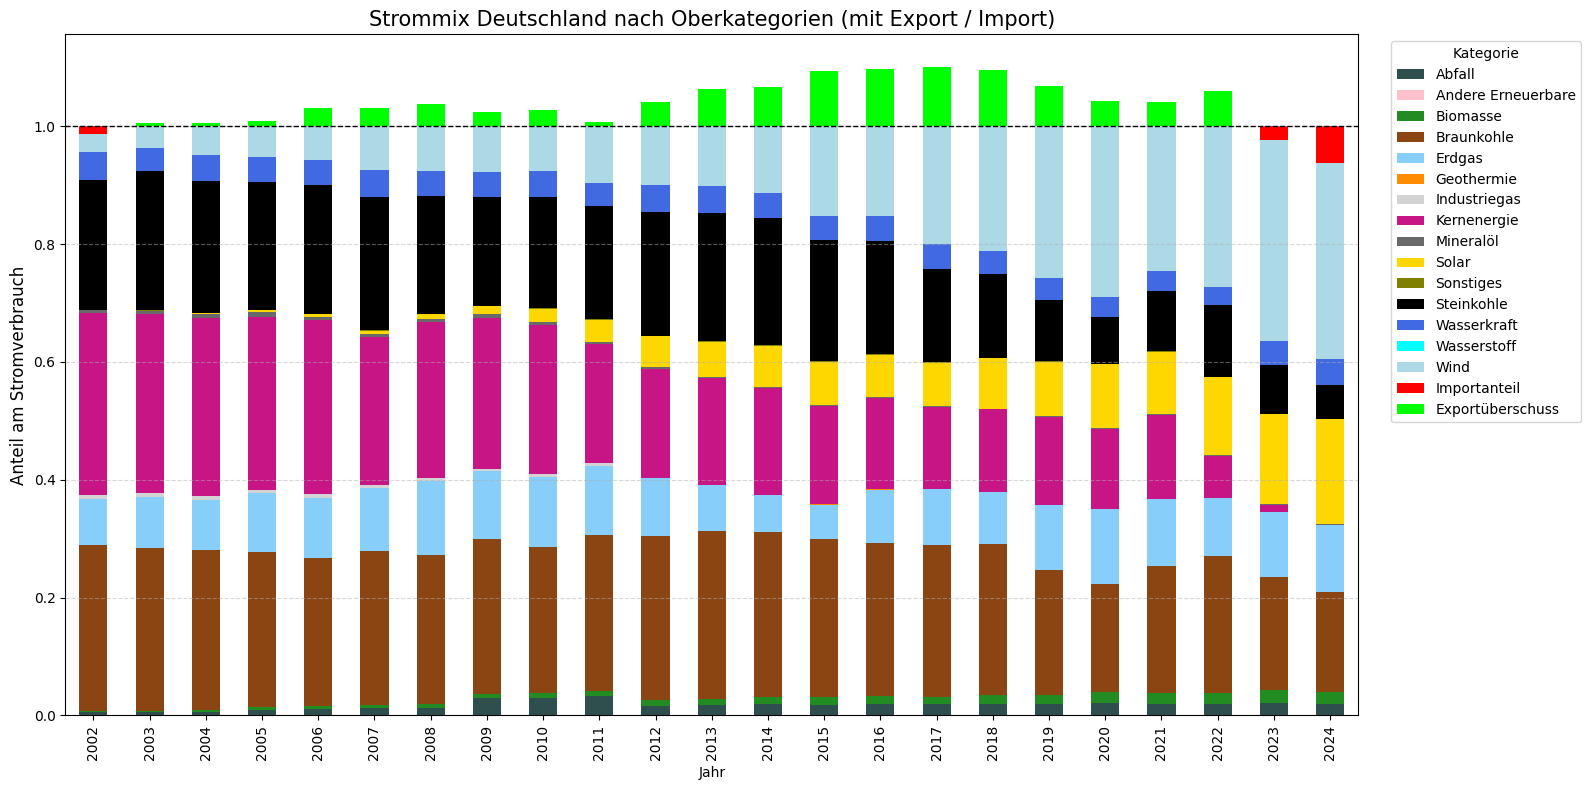

In [7]:
df_clean = strommix_gesamt[
    ~strommix_gesamt["Typ"].isin(["Einfuhr von Elektrizität", "Ausfuhr von Elektrizität"])
]

# Summe aller Typen (ohne Austauschsaldo)
produktion = df_clean[df_clean["Typ"] != "Austauschsaldo"]
produktion_summe = produktion.groupby("Jahr")["Elektrizitätserzeugung (netto)"].sum().reset_index()
produktion_summe = produktion_summe.rename(columns={"Elektrizitätserzeugung (netto)": "Inlandsproduktion"})

# Austauschsaldo (positiv = Import, negativ = Export)
saldo = df_clean[df_clean["Typ"] == "Austauschsaldo"][["Jahr", "Elektrizitätserzeugung (netto)"]]
saldo = saldo.rename(columns={"Elektrizitätserzeugung (netto)": "Austauschsaldo"})

# Zusammenführen
basis = produktion_summe.merge(saldo, on="Jahr", how="left").fillna(0)

# Berechne Kategorie-Anteile (inkl. Import!)
produktion_rel = produktion.merge(basis, on="Jahr")
produktion_rel["Anteil"] = produktion_rel["Elektrizitätserzeugung (netto)"] / (
    produktion_rel["Inlandsproduktion"] + produktion_rel["Austauschsaldo"].clip(lower=0)
)

# Gruppieren nach Kategorie
produktion_kat = produktion_rel.groupby(["Jahr", "Kategorie"])["Anteil"].sum().reset_index()

# Importanteil (innerhalb der 100%)
import_df = basis[basis["Austauschsaldo"] > 0].copy()
import_df["Anteil"] = import_df["Austauschsaldo"] / (import_df["Inlandsproduktion"] + import_df["Austauschsaldo"])
import_df["Kategorie"] = "Importanteil"

# Exportüberschuss (oberhalb der 100%)
export_df = basis[basis["Austauschsaldo"] < 0].copy()
export_df["Anteil"] = -export_df["Austauschsaldo"] / export_df["Inlandsproduktion"]
export_df["Kategorie"] = "Exportüberschuss"

# Zusammenführen für den Plot
df_plot_ready = pd.concat([
    produktion_kat[["Jahr", "Kategorie", "Anteil"]],
    import_df[["Jahr", "Kategorie", "Anteil"]],
    export_df[["Jahr", "Kategorie", "Anteil"]],
])

# Pivot + Sortierung: Exportüberschuss zuletzt
pivot_plot = df_plot_ready.pivot_table(
    index="Jahr",
    columns="Kategorie",
    values="Anteil",
    aggfunc="sum"
).fillna(0)

# Export & Import ans Ende
cols = list(pivot_plot.columns)
for special in ["Importanteil", "Exportüberschuss"]:
    if special in cols:
        cols = [c for c in cols if c != special] + [special]
pivot_plot = pivot_plot[cols]

# Plot

tab20_colors = plt.get_cmap("tab20").colors
safe_colors = [c for i, c in enumerate(tab20_colors) if i not in [4,5,6]]
categories = list(pivot_plot.columns)

#['Abfall', 'Andere Erneuerbare', 'Biomasse', 'Braunkohle', 'Erdgas', 'Export', 'Geothermie', 'Import', 'Import/Export', 'Industriegas', 'Kernenergie', 'Mineralöl', 'SUMME', 'Solar', 'Sonstiges', 'Steinkohle', 'Wasserkraft', 'Wasserstoff', 'Wind']
color_map = {
    "Abfall": "darkslategray",
    "Biomasse": "forestgreen",
    "Braunkohle": "saddlebrown",
    "Erdgas": "lightskyblue",
    "Geothermie": "darkorange",
    "Industriegas": "lightgray",
    "Kernenergie": "mediumvioletred",
    "Mineralöl": "dimgray",
    "Solar": "gold",
    "Sonstiges": "olive",
    "Steinkohle": "black",
    "Wasserkraft": "royalblue",
    "Wind": "lightblue",
    "Wasserstoff": "cyan",
    "Andere Erneuerbare": "pink",
    "Importanteil": "red",
    "Exportüberschuss": "lime",
}

# Farben in der korrekten Reihenfolge als Liste
colors = [color_map[cat] for cat in categories]

pivot_plot.plot(
    kind="bar",
    stacked=True,
    figsize=(16, 8),
    color=colors
)

plt.axhline(1, color='black', linestyle='--', linewidth=1)  # 100%-Linie
plt.title("Strommix Deutschland nach Oberkategorien (mit Export / Import)", fontsize=15)
plt.ylabel("Anteil am Stromverbrauch", fontsize=12)
plt.xlabel("Jahr")
plt.legend(title="Kategorie", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



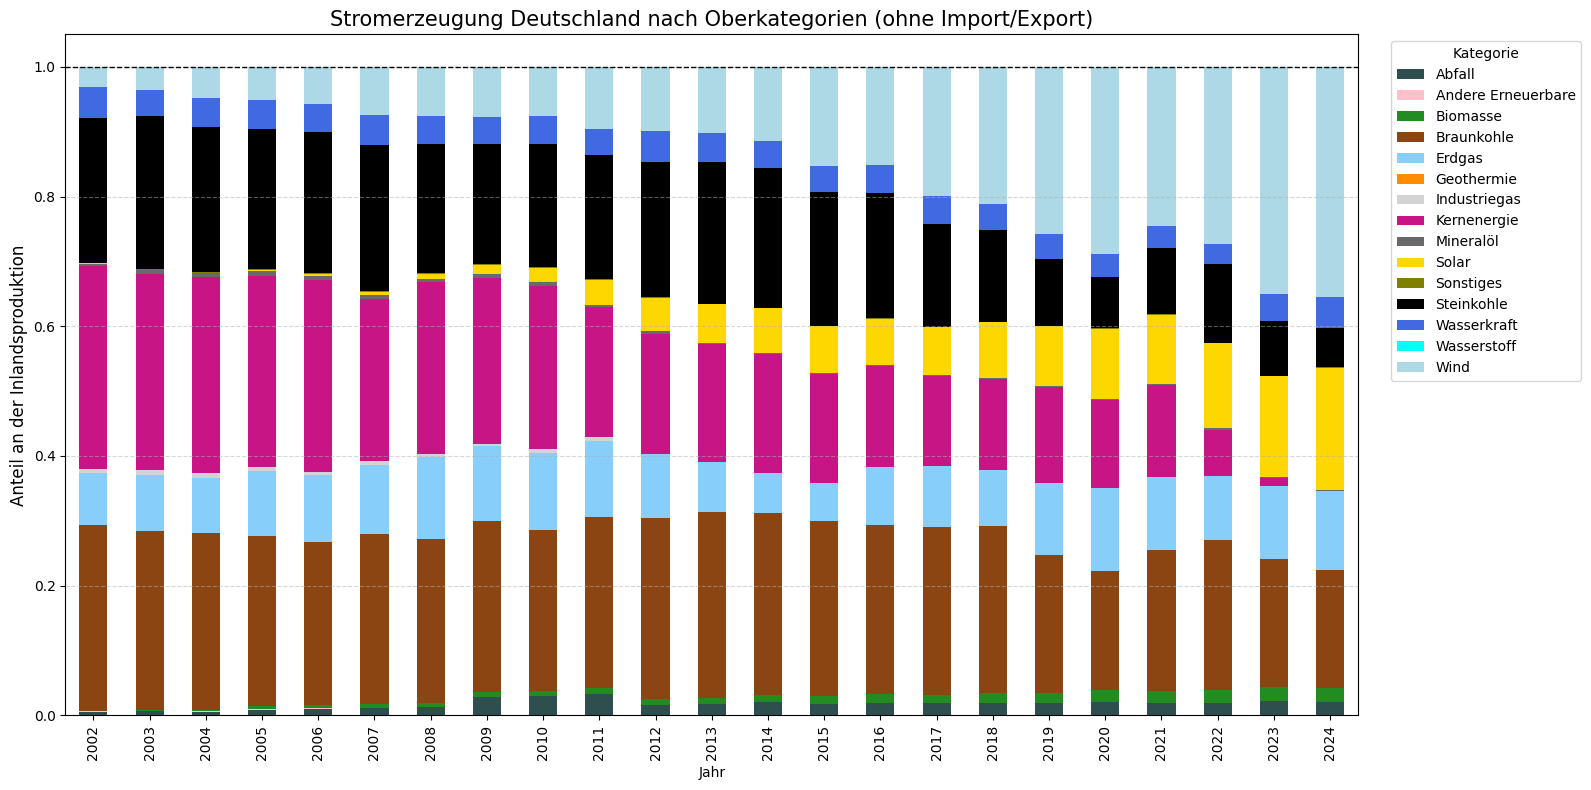

In [8]:
# Inlandsproduktion
produktion_only = produktion_kat.copy()
produktion_only = produktion_only[~produktion_only["Kategorie"].isin(["Importanteil", "Exportüberschuss"])]

# Normierung
produktion_only_pivot = produktion_only.pivot_table(
    index="Jahr",
    columns="Kategorie",
    values="Anteil",
    aggfunc="sum"
).fillna(0)
produktion_only_pivot = produktion_only_pivot.div(produktion_only_pivot.sum(axis=1), axis=0)

categories_no_import_export = list(produktion_only_pivot.columns)
colors_no_import_export = [color_map[cat] for cat in categories_no_import_export]

produktion_only_pivot.plot(
    kind="bar",
    stacked=True,
    figsize=(16, 8),
    color=colors_no_import_export
)

plt.axhline(1, color='black', linestyle='--', linewidth=1)  # 100%
plt.title("Stromerzeugung Deutschland nach Oberkategorien (ohne Import/Export)", fontsize=15)
plt.ylabel("Anteil an der Inlandsproduktion", fontsize=12)
plt.xlabel("Jahr")
plt.legend(title="Kategorie", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


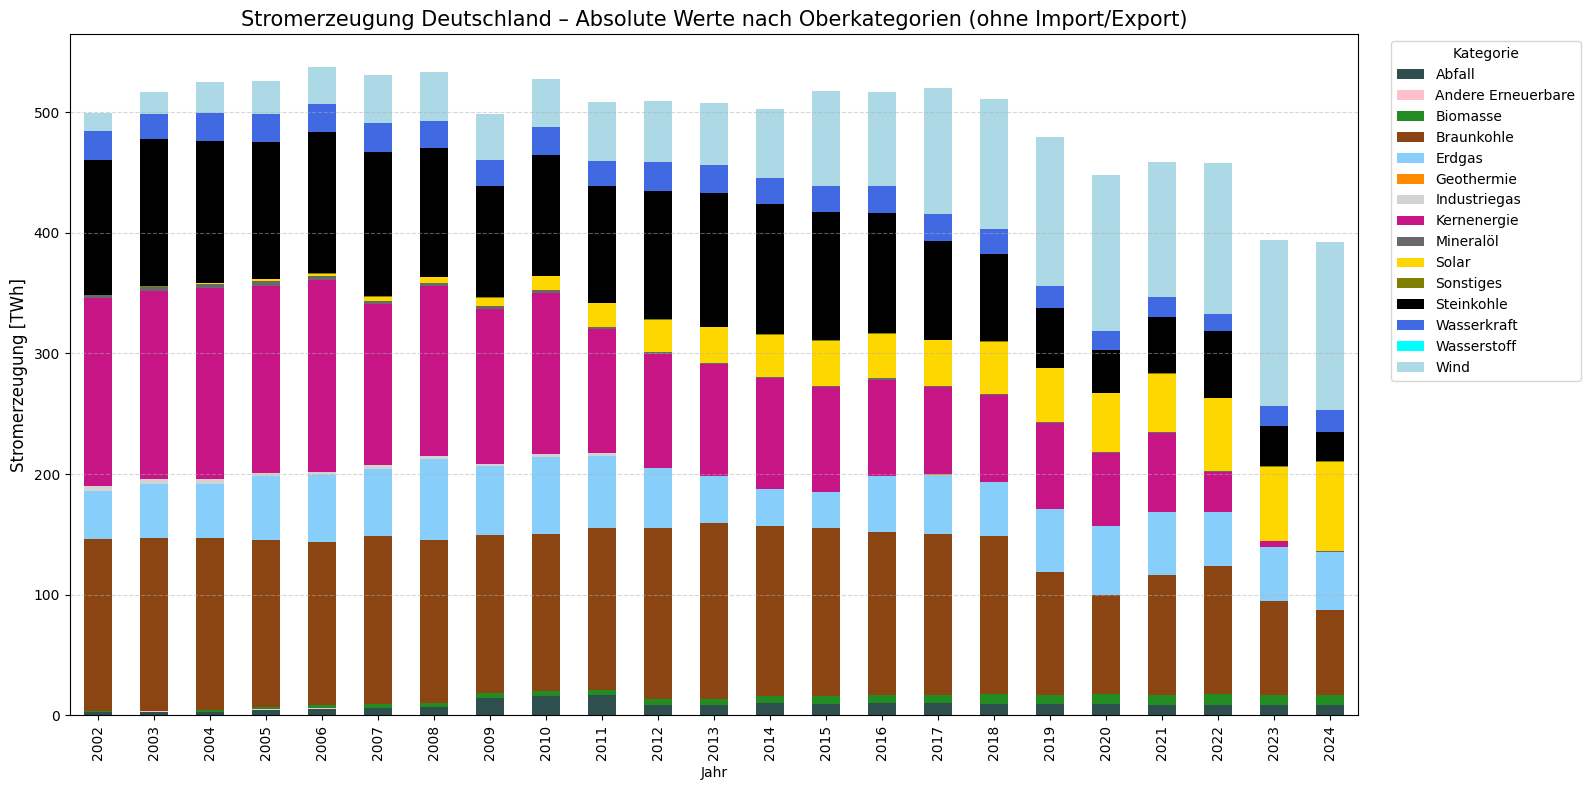

In [9]:
# Nur Inlandsproduktion, ohne Import/Export
produktion_absolute_only = produktion.copy()
produktion_absolute_only = produktion_absolute_only[
    ~produktion_absolute_only["Kategorie"].isin(["Importanteil", "Exportüberschuss"])
]

# Pivot auf absolute Werte
produktion_absolute_pivot = produktion_absolute_only.pivot_table(
    index="Jahr",
    columns="Kategorie",
    values="Elektrizitätserzeugung (netto)",
    aggfunc="sum"
).fillna(0)

# Einheit umrechnen: MWh -> TWh
produktion_absolute_pivot = produktion_absolute_pivot / 1_000_000  # 1 TWh = 1 Mio MWh

# Farben in korrekter Reihenfolge
categories_absolute = list(produktion_absolute_pivot.columns)
colors_absolute = [color_map.get(cat, "hotpink") for cat in categories_absolute]

# Plot
ax = produktion_absolute_pivot.plot(
    kind="bar",
    stacked=True,
    figsize=(16, 8),
    color=colors_absolute
)

ax.set_title("Stromerzeugung Deutschland – Absolute Werte nach Oberkategorien (ohne Import/Export)", fontsize=15)
ax.set_ylabel("Stromerzeugung [TWh]", fontsize=12)
ax.set_xlabel("Jahr")
ax.legend(title="Kategorie", bbox_to_anchor=(1.02, 1), loc="upper left")
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


In [10]:
#['Abfall', 'Andere Erneuerbare', 'Biomasse', 'Braunkohle', 'Erdgas', 'Export', 'Geothermie', 'Import', 'Import/Export', 'Industriegas', 'Kernenergie', 'Mineralöl', 
# 'SUMME', 'Solar', 'Sonstiges', 'Steinkohle', 'Wasserkraft', 'Wasserstoff', 'Wind']
include_kategorien = ['Abfall', 'Biomasse', 'Braunkohle', 'Erdgas', 
                      'Geothermie', 'Industriegas', 'Kernenergie', 
                      'Mineralöl', 'Solar', 'Sonstiges', 'Steinkohle', 
                      'Wasserkraft', 'Wind', 'Wasserstoff', 'Andere Erneuerbare'] # 'Import', 'Export'

print(list(set(include_kategorien).symmetric_difference(TOP_LEVEL_CATEGORIES)))

strommix_filtered = strommix_gesamt[strommix_gesamt["Kategorie"].isin(include_kategorien)]

# Sum by Kategorie and Jahr
strommix_for_prophet = (
    strommix_filtered
    .groupby(["Kategorie", "Jahr"], as_index=False)
    .agg({"Elektrizitätserzeugung (netto)": "sum"})
)

# Prophet labels
strommix_for_prophet = strommix_for_prophet.rename(columns={
    "Jahr": "ds",
    "Elektrizitätserzeugung (netto)": "y"
})

# year to datetime
strommix_for_prophet["ds"] = pd.to_datetime(strommix_for_prophet["ds"], format="%Y")

# Inbetween to print the included categories in the data
included_categories_test = sorted(strommix_for_prophet["Kategorie"].unique())
print(f"Prophet Kategorien: {', '.join(included_categories_test)}")
ignorierte_kategorien = [cat for cat in TOP_LEVEL_CATEGORIES if cat not in included_categories_test]

print(f"Ignorierte Kategorien: {', '.join(ignorierte_kategorien)}")
print(f"Es sind {len(included_categories_test)} from {len(include_kategorien)} that are allowed from {len(TOP_LEVEL_CATEGORIES)} total.")


strommix_for_prophet


['Import/Export', 'Import', 'Export']
Prophet Kategorien: Abfall, Andere Erneuerbare, Biomasse, Braunkohle, Erdgas, Geothermie, Industriegas, Kernenergie, Mineralöl, Solar, Sonstiges, Steinkohle, Wasserkraft, Wasserstoff, Wind
Ignorierte Kategorien: Export, Import, Import/Export
Es sind 15 from 15 that are allowed from 18 total.


,Kategorie,ds,y
0,Abfall,2002-01-01,2926818.0
1,Abfall,2003-01-01,3182945.0
2,Abfall,2004-01-01,3094261.0
3,Abfall,2005-01-01,4524205.0
4,Abfall,2006-01-01,5523466.0
...,...,...,...
340,Wind,2020-01-01,129600000.0
341,Wind,2021-01-01,112500000.0
342,Wind,2022-01-01,124800000.0
343,Wind,2023-01-01,137800000.0


In [11]:
from prophet import Prophet

forecast_years = [2025, 2030, 2035, 2040, 2045, 2050, 2055, 2060]
future_dates = pd.DataFrame({'ds': pd.to_datetime([f'{year}-01-01' for year in forecast_years])})

all_forecasts = []

for category in strommix_for_prophet['Kategorie'].unique():
    # Filter data for the current category
    df_cat = strommix_for_prophet[strommix_for_prophet['Kategorie'] == category][['ds', 'y']].copy()
    df_cat['ds'] = pd.to_datetime(df_cat['ds'])

    # Skip if all values are zero or missing
    if df_cat['y'].sum() == 0 or df_cat['y'].isna().all():
        continue

    model = Prophet(yearly_seasonality=False, daily_seasonality=False, weekly_seasonality=False)
    model.fit(df_cat)

    # Predict for future years
    forecast = model.predict(future_dates)
    forecast['Kategorie'] = category
    
        
    # Clamp forecasts to zero to avoid negative energy values
    forecast['yhat'] = forecast['yhat'].clip(lower=0)  
  

    forecast_result = forecast[['ds', 'yhat', 'Kategorie']]

    all_forecasts.append(forecast_result)

# Combine all category forecasts
final_forecast_df = pd.concat(all_forecasts, ignore_index=True)


c:\Users\sulta\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
16:35:16 - cmdstanpy - INFO - Chain [1] start processing
16:35:16 - cmdstanpy - INFO - Chain [1] done processing
16:35:16 - cmdstanpy - INFO - Chain [1] start processing
16:35:16 - cmdstanpy - INFO - Chain [1] done processing
16:35:16 - cmdstanpy - INFO - Chain [1] start processing
16:35:16 - cmdstanpy - INFO - Chain [1] done processing
16:35:17 - cmdstanpy - INFO - Chain [1] start processing
16:35:17 - cmdstanpy - INFO - Chain [1] done processing
16:35:17 - cmdstanpy - INFO - Chain [1] start processing
16:35:17 - cmdstanpy - INFO - Chain [1] done processing
16:35:17 - cmdstanpy - INFO - Chain [1] start processing
16:35:17 - cmdstanpy - INFO - Chain [1] do

In [12]:
# Modify Predictions

# Clamp Kernenergie to 0 because it has been banned
final_forecast_df.loc[final_forecast_df["Kategorie"] == "Kernenergie", "yhat"] = 0


In [13]:
import matplotlib.pyplot as plt

# Merge original and forecasted data for unified plotting
original = strommix_for_prophet.copy()
original['ds'] = pd.to_datetime(original['ds'])
original['Type'] = 'Historisch'
original = original.rename(columns={'y': 'value'})

forecast = final_forecast_df.copy()
forecast['Type'] = 'Prognose'
forecast = forecast.rename(columns={'yhat': 'value'})

# Combine both
combined = pd.concat([
    original[['Kategorie', 'ds', 'value', 'Type']],
    forecast[['Kategorie', 'ds', 'value', 'Type']]
])


combined[combined['ds'] == '2025-01-01']

,Kategorie,ds,value,Type
0,Abfall,2025-01-01,1.116449e+07,Prognose
8,Andere Erneuerbare,2025-01-01,0.000000e+00,Prognose
16,Biomasse,2025-01-01,9.835276e+06,Prognose
24,Braunkohle,2025-01-01,9.359909e+07,Prognose
32,Erdgas,2025-01-01,4.674384e+07,Prognose
40,Geothermie,2025-01-01,3.674068e+04,Prognose
48,Industriegas,2025-01-01,0.000000e+00,Prognose
56,Kernenergie,2025-01-01,0.000000e+00,Prognose
64,Mineralöl,2025-01-01,1.226912e+05,Prognose
72,Solar,2025-01-01,6.715822e+07,Prognose


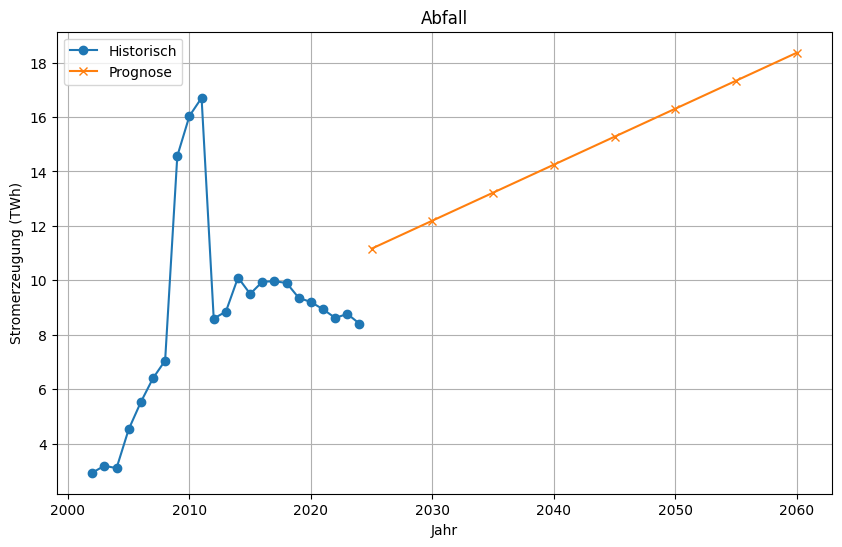

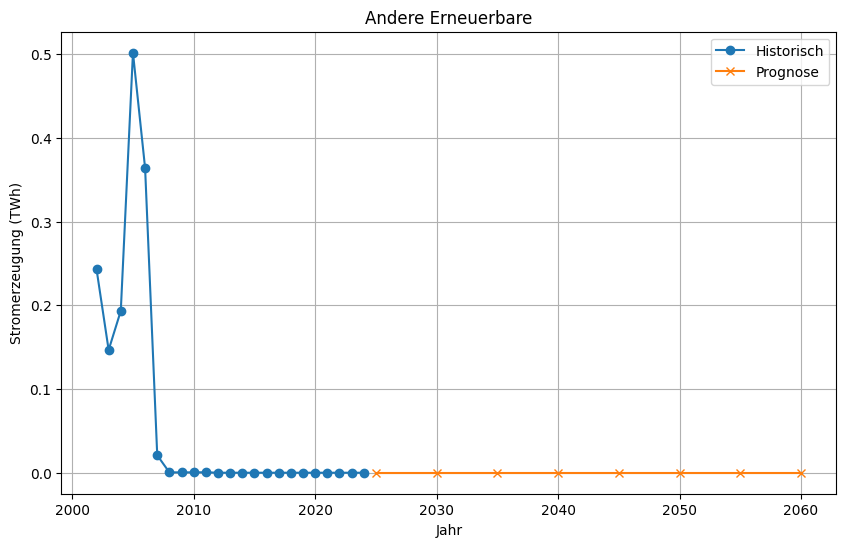

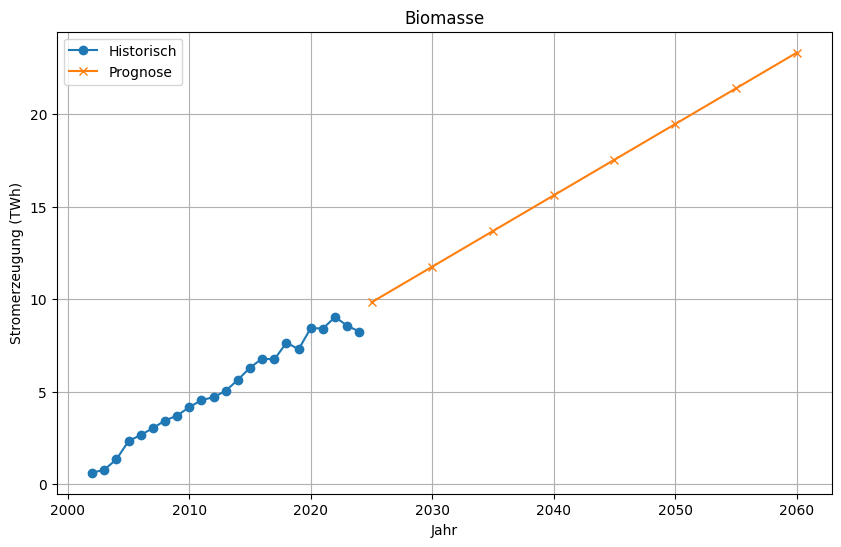

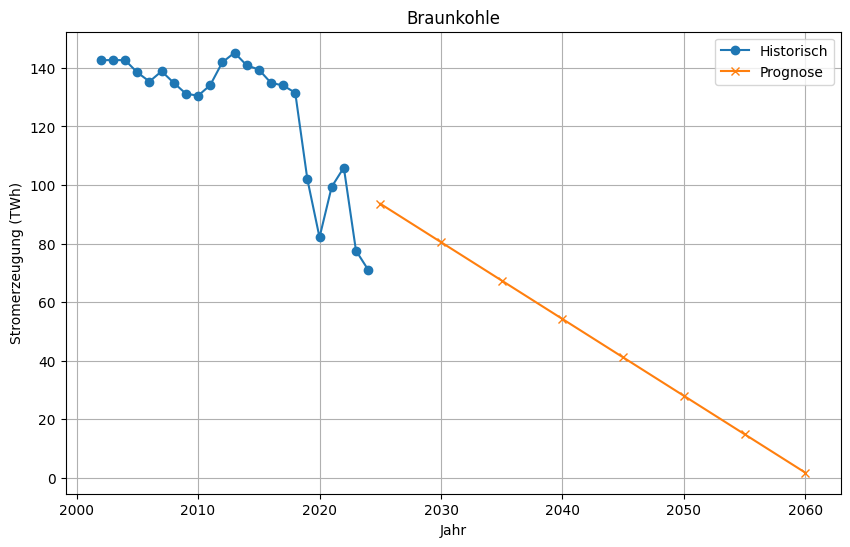

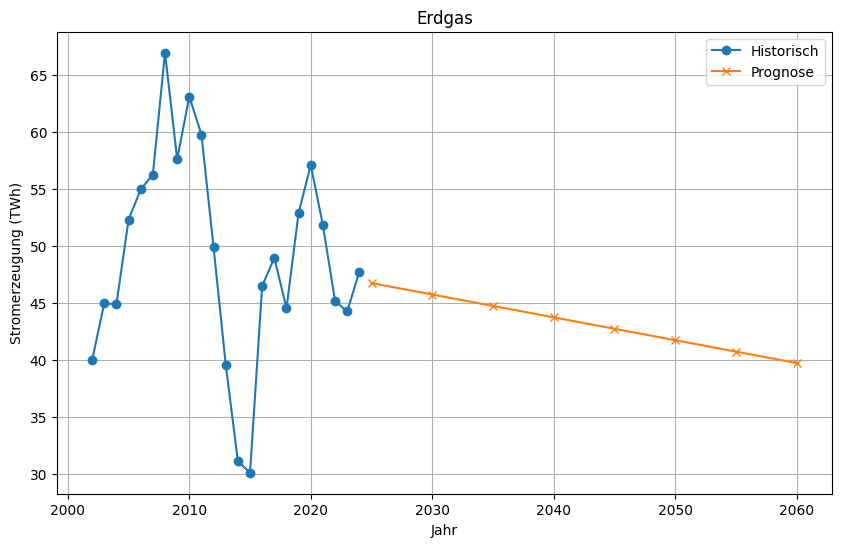

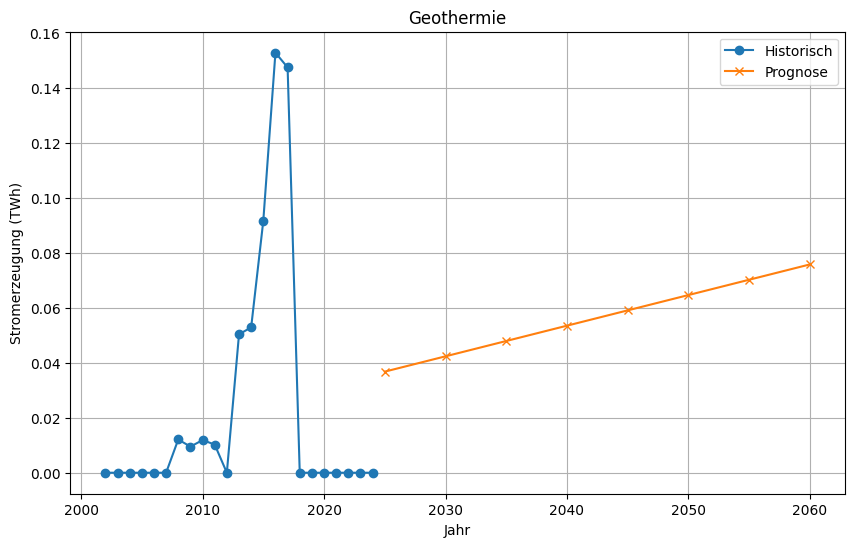

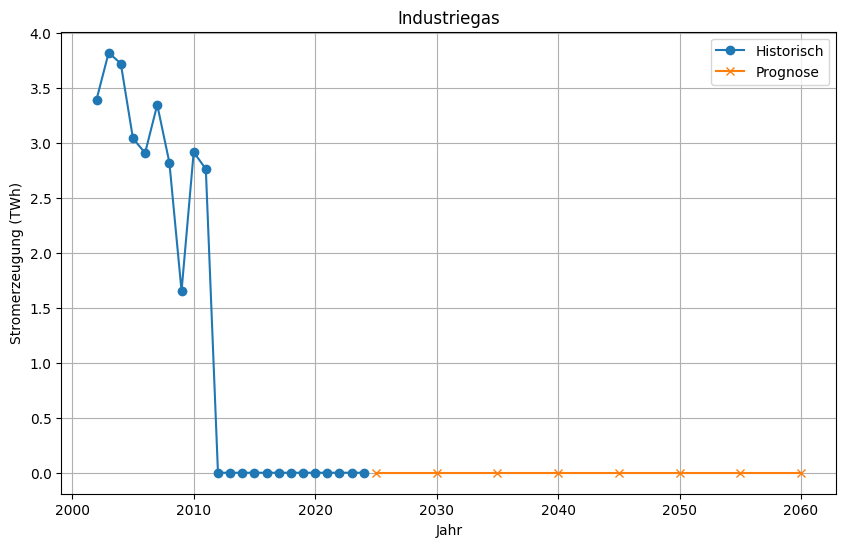

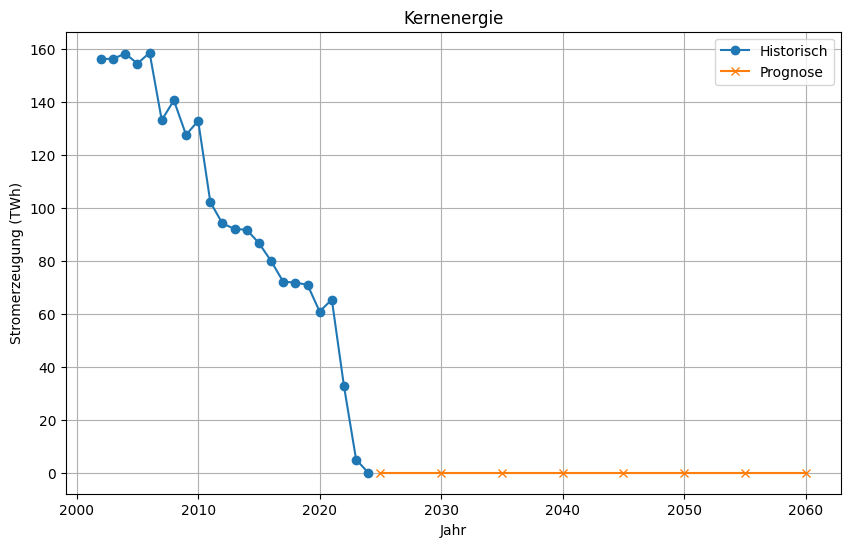

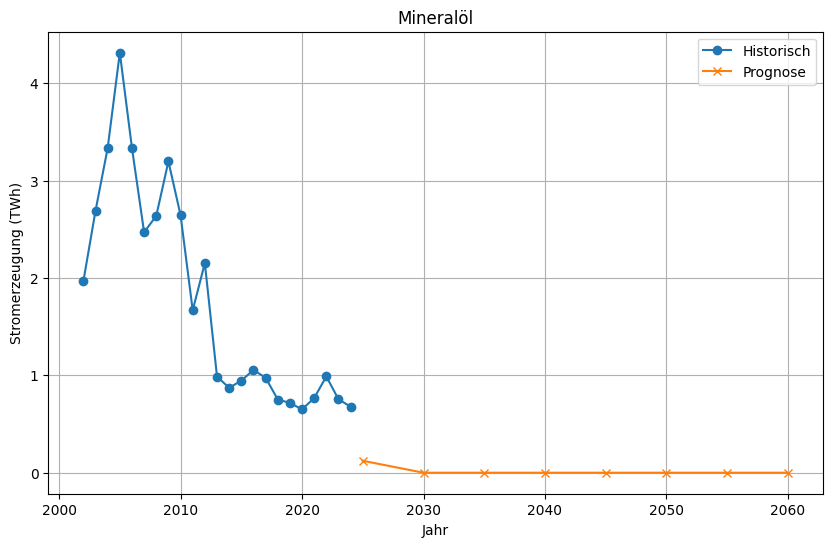

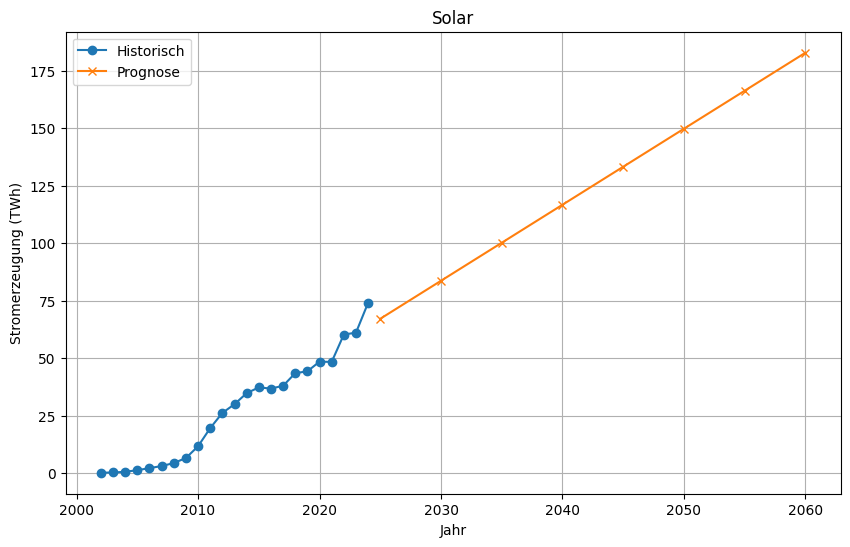

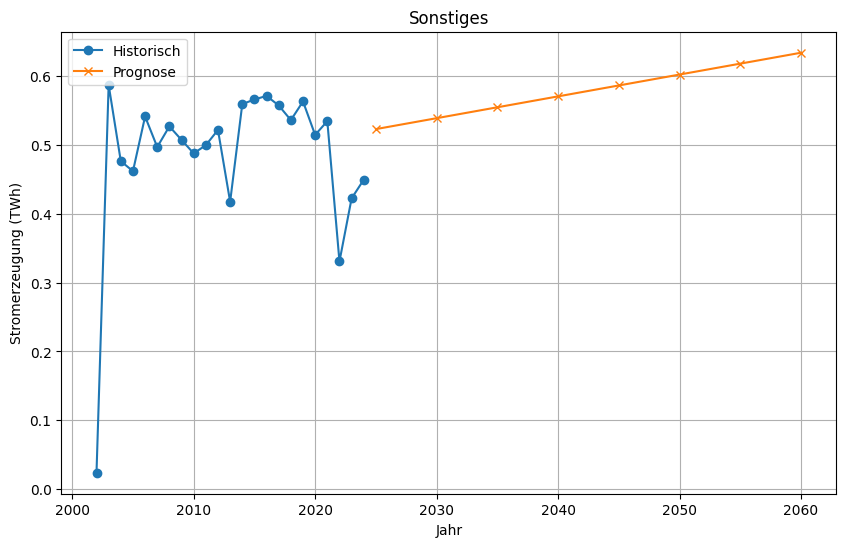

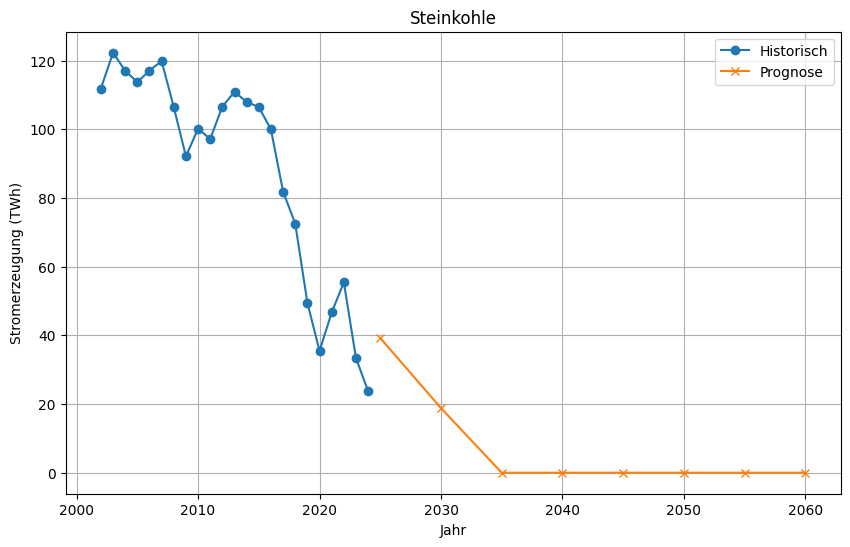

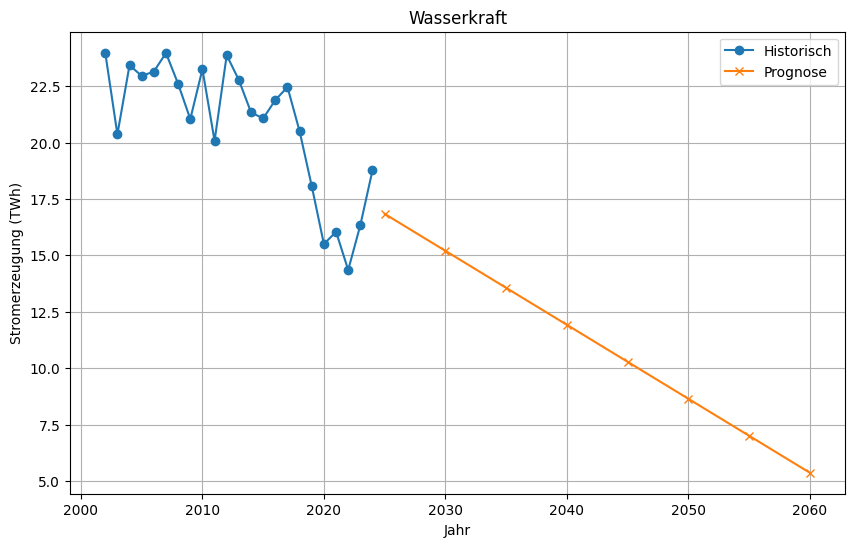

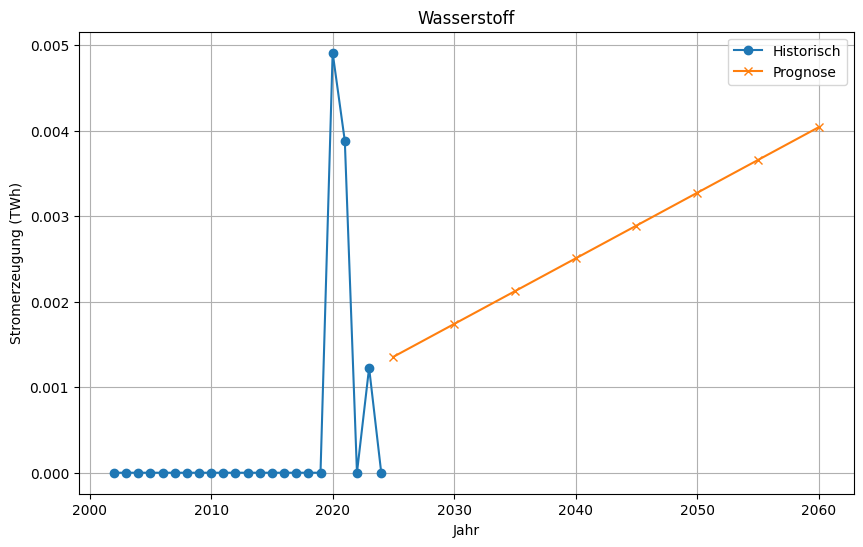

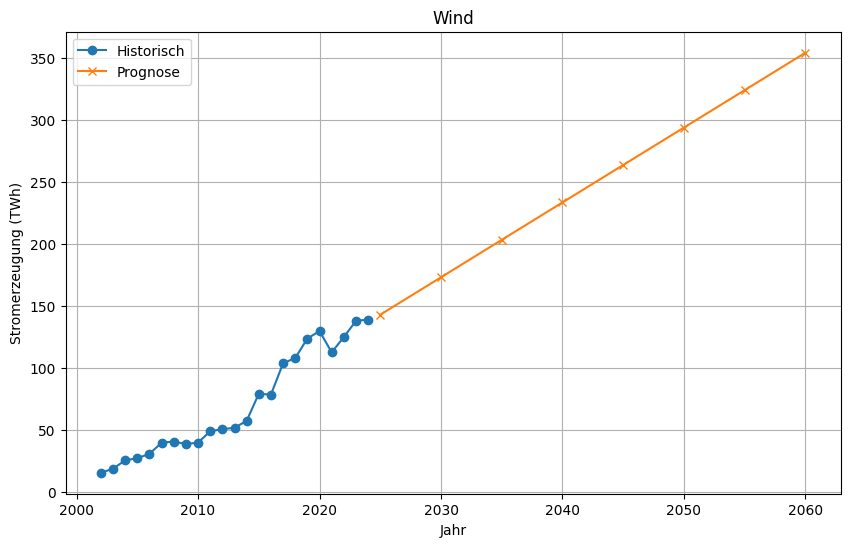

In [14]:
# Convert to TWh
combined_twh = combined.copy()
combined_twh["value"] = combined_twh["value"] / 1_000_000

# Get global y-axis limits for consistent scaling
y_min = combined_twh['value'].min()
y_max = combined_twh['value'].max()

# Plot and save each category
for category in combined_twh['Kategorie'].unique():
    cat_data = combined_twh[combined_twh['Kategorie'] == category]
    fig, ax = plt.subplots(figsize=(10, 6))

    for label, grp in cat_data.groupby('Type'):
        marker = 'o' if label == 'Historisch' else 'x'
        ax.plot(grp['ds'], grp['value'], marker=marker, label=label)

    ax.set_title(category)
    ax.set_xlabel('Jahr')
    ax.set_ylabel('Stromerzeugung (TWh)')
    # ax.set_ylim(y_min, y_max)
    ax.legend()
    ax.grid(True)

    # Save the plot
    cat_name = category.lower().replace(' ', '_').replace('/', "_")
    filename = f"prediction_{cat_name}.png"
    fig.savefig(os.path.join(PLOT_PREDICTIONS_DIR, filename), dpi=300, bbox_inches='tight')

    # Show in notebook
    plt.show()


### Scenario 1: Literature Data with filled in predictions

#### Long Format

In [15]:
import pandas as pd

CATEGORY_BLACKLIST = ["wind_onshore", "wind_offshore"]
COLUMN_BLACKLIST = ["Notes", "Category"]

# Load Excel file, assuming your data is in the first sheet
df_literature_short = pd.read_excel("in/germany_gridmix_for_Premise.xlsx", sheet_name="DATA_SHORT")

df_literature_short = df_literature_short[
    ~df_literature_short["Label"].isin(CATEGORY_BLACKLIST)
    # ~df_lit["Label" == "wind_offshore"] 
]

df_literature_short[df_literature_short.select_dtypes(include='number').columns] /= 100
df_literature_short = df_literature_short.drop(columns=["Notes", "Category"])

# Preview
print("Short")
print(df_literature_short.head(20))

df_literature_long = pd.read_excel("in/germany_gridmix_for_Premise.xlsx", sheet_name="DATA_LONG")

df_literature_long = df_literature_long[
    ~df_literature_long["Label"].isin(["wind_onshore", "wind_offshore"])
]

df_literature_long = df_literature_long.drop(columns=["Notes", "Category"])
df_literature_long[df_literature_long.select_dtypes(include='number').columns] /= 100

# Preview
print("\n\nlong")
print(df_literature_long)

print("SHORT total per year:\n", df_literature_short.select_dtypes(include='number').sum())
print("\nLONG total per year:\n", df_literature_long.select_dtypes(include='number').sum())



Short
          Label Energy Source Unit    2019    2022    2023   2024    2030  \
2          Wind          Wind    %  0.2207  0.2541  0.3170  0.330  0.4026   
3         Solar  Photovoltaik    %  0.0806  0.1121  0.1232  0.145  0.2671   
4      Biomasse       Biomass    %  0.0876  0.0800  0.0853  0.089  0.0671   
5   Wasserkraft   Wasserkraft    %  0.0350  0.0251  0.0322  0.053  0.0309   
6    Steinkohle    Steinkohle    %     NaN  0.1275  0.0886  0.053     NaN   
7    Braunkohle    Braunkohle    %     NaN  0.2099  0.1736  0.172     NaN   
8        Erdgas        Erdgas    %     NaN  0.0774  0.1118  0.058     NaN   
9    Geothermie    Geothermie    %  0.0004     NaN     NaN    NaN  0.0040   
10  Kernenergie   Kernenergie    %     NaN  0.0666  0.0150    NaN     NaN   

     2050  
2     NaN  
3   0.226  
4     NaN  
5   0.033  
6   0.041  
7   0.020  
8   0.005  
9     NaN  
10    NaN  


long
                 Label       Energy Source Unit    2019    2022    2023  \
2                 Win

In [16]:
# Step 1: Extract year and normalize predicted absolute values into shares
df_combined = combined.copy()

print("\n[INFO] Step 1: Normalize predicted values to shares")
df_combined["Year"] = pd.to_datetime(df_combined["ds"]).dt.year
df_combined["year_total"] = df_combined.groupby("Year")["value"].transform("sum")
df_combined["predicted_share"] = df_combined["value"] / df_combined["year_total"]

print("[DEBUG] Sample of predicted shares:")
print(df_combined[["Kategorie", "Year", "value", "predicted_share"]].head())

# Step 2: Convert df_literature_short to long format
print("\n[INFO] Step 2: Reshape df_literature_short to long format")
df_short_long = df_literature_short.melt(
    id_vars=["Label", "Energy Source", "Unit"],
    var_name="Year",
    value_name="observed_share"
)
df_short_long["Year"] = df_short_long["Year"].astype(int)

print("[DEBUG] Sample of observed shares (long format):")
print(df_short_long.head())

# Step 3: Merge observed and predicted values using only 'Energy Source'
print("\n[INFO] Step 3: Merge observed and predicted shares on 'Energy Source' only")
merged = pd.merge(
    df_short_long,
    df_combined[["Kategorie", "Year", "predicted_share"]],
    how="left",
    left_on=["Energy Source", "Year"],
    right_on=["Kategorie", "Year"]
)

print("[DEBUG] Merged result:")
print(merged.head(10))

# Step 4: Strictly prefer observed (even if 0.0), fallback to predicted only if NaN
print("\n[INFO] Step 4: Combine observed and predicted shares (no renormalization)")
merged["use_predicted"] = merged["observed_share"].isna()
merged["final_share"] = merged.apply(
    lambda row: row["predicted_share"] if row["use_predicted"] else row["observed_share"],
    axis=1
)


# Step 4.5: Compare predicted vs observed for debugging
print("\n[DEBUG] Step 4.5: Differences between observed and predicted shares (where both exist)")
diff_check = merged[
    merged["observed_share"].notna() & merged["predicted_share"].notna()
].copy()
diff_check["abs_diff"] = (diff_check["observed_share"] - diff_check["predicted_share"]).abs()
print(diff_check[["Energy Source", "Year", "observed_share", "predicted_share", "abs_diff"]].sort_values(by="abs_diff", ascending=False))


# Step 5: Compute sum of shares per year (for coverage insight)
print("\n[INFO] Step 5: Compute yearly share completeness (sums < 1.0 = missing technologies)")
merged["sum_per_year"] = merged.groupby("Year")["final_share"].transform("sum")

# Debug print for one year
debug_year = 2030
print(f"\n[DEBUG] Shares in {debug_year} and total sum:")
print(merged[merged["Year"] == debug_year][['Energy Source', 'final_share']].sort_values(by="final_share", ascending=False))
print(f"Total share in {debug_year}: {merged[merged['Year'] == debug_year]['final_share'].sum():.4f}")

# Step 6: Pivot back to wide format
print("\n[INFO] Step 6: Pivoting back to wide format without renormalization")
final_df = merged.pivot_table(
    index=["Energy Source", "Unit"],
    columns="Year",
    values="final_share"
).reset_index()

print("[DEBUG] Final mixed table (not normalized to 1.0):")
print(final_df.head())

# Step 7: Print final coverage per year
print("\n[INFO] Total share per year (should be <= 1.0):")
print(final_df.select_dtypes(include='number').sum())

print("[DEBUG] Any unexpected technologies?")
print(merged[merged["Kategorie"].notna() & merged["Energy Source"].isna()])



[INFO] Step 1: Normalize predicted values to shares
[DEBUG] Sample of predicted shares:
  Kategorie  Year      value  predicted_share
0    Abfall  2002  2926818.0         0.005858
1    Abfall  2003  3182945.0         0.006157
2    Abfall  2004  3094261.0         0.005898
3    Abfall  2005  4524205.0         0.008606
4    Abfall  2006  5523466.0         0.010277

[INFO] Step 2: Reshape df_literature_short to long format
[DEBUG] Sample of observed shares (long format):
         Label Energy Source Unit  Year  observed_share
0         Wind          Wind    %  2019          0.2207
1        Solar  Photovoltaik    %  2019          0.0806
2     Biomasse       Biomass    %  2019          0.0876
3  Wasserkraft   Wasserkraft    %  2019          0.0350
4   Steinkohle    Steinkohle    %  2019             NaN

[INFO] Step 3: Merge observed and predicted shares on 'Energy Source' only
[DEBUG] Merged result:
         Label Energy Source Unit  Year  observed_share    Kategorie  \
0         Wind      

In [17]:
# fixme may not work, tries to renomalize the shares
# Step 1: Extract year from combined and normalize values to predicted shares
print("\n[INFO] Step 1: Normalize predicted values to shares")
combined["Year"] = pd.to_datetime(combined["ds"]).dt.year
combined["year_total"] = combined.groupby("Year")["value"].transform("sum")
combined["predicted_share"] = combined["value"] / combined["year_total"]

# Display debug information for predicted shares
print("[DEBUG] Sample of predicted shares (normalized):")
print(combined[["Kategorie", "Year", "value", "predicted_share"]].head())

# Step 2: Convert df_literature_short from wide to long format
print("\n[INFO] Step 2: Reshape df_literature_short to long format")
df_short_long = df_literature_short.melt(
    id_vars=["Label", "Energy Source", "Unit"],
    var_name="Year",
    value_name="observed_share"
)
df_short_long["Year"] = df_short_long["Year"].astype(int)

print("[DEBUG] Sample of observed shares (long format):")
print(df_short_long.head())

# Step 3: Merge with combined on Label/Kategorie and Year
print("\n[INFO] Step 3: Merge observed and predicted data")
merged = pd.merge(
    df_short_long,
    combined[["Kategorie", "Year", "predicted_share"]],
    how="outer",
    left_on=["Label", "Year"],
    right_on=["Kategorie", "Year"]
)

print("[DEBUG] Merged data (with both observed and predicted):")
print(merged.head(10))

# Step 4: Combine: use observed if available, otherwise fallback to predicted
print("\n[INFO] Step 4: Mix observed and predicted shares")
merged["final_share"] = merged["observed_share"].combine_first(merged["predicted_share"])

# Step 5: Re-normalize shares per year
print("\n[INFO] Step 5: Renormalizing final shares per year (to sum up to 1.0)")
merged["sum_per_year"] = merged.groupby("Year")["final_share"].transform("sum")
merged["normalized_share"] = merged["final_share"] / merged["sum_per_year"]

# Print debug summary for a specific year to verify
debug_year = 2030
print(f"\n[DEBUG] Normalized shares for year {debug_year}:")
print(merged[merged["Year"] == debug_year][["Label", "normalized_share"]].sort_values(by="normalized_share", ascending=False))

# Step 6: Pivot back to wide format
print("\n[INFO] Step 6: Pivoting back to wide format for final DataFrame")
final_df = merged.pivot_table(
    index=["Label", "Energy Source", "Unit"],
    columns="Year",
    values="normalized_share"
).reset_index()

print("[DEBUG] Final mixed and normalized table:")
print(final_df.head(10))

# Optional: show column totals to verify normalization
print("\n[INFO] Final column-wise sum (should be ~1.0):")
print(final_df.select_dtypes(include='number').sum())



[INFO] Step 1: Normalize predicted values to shares
[DEBUG] Sample of predicted shares (normalized):
  Kategorie  Year      value  predicted_share
0    Abfall  2002  2926818.0         0.005858
1    Abfall  2003  3182945.0         0.006157
2    Abfall  2004  3094261.0         0.005898
3    Abfall  2005  4524205.0         0.008606
4    Abfall  2006  5523466.0         0.010277

[INFO] Step 2: Reshape df_literature_short to long format
[DEBUG] Sample of observed shares (long format):
         Label Energy Source Unit  Year  observed_share
0         Wind          Wind    %  2019          0.2207
1        Solar  Photovoltaik    %  2019          0.0806
2     Biomasse       Biomass    %  2019          0.0876
3  Wasserkraft   Wasserkraft    %  2019          0.0350
4   Steinkohle    Steinkohle    %  2019             NaN

[INFO] Step 3: Merge observed and predicted data
[DEBUG] Merged data (with both observed and predicted):
  Label Energy Source Unit  Year  observed_share Kategorie  predicted_sh

In [18]:

# df_lit_filled
# Result: df_lit_filled now contains original literature data, 
# with missing percentages filled in from df_combined

# TOP_LEVEL_CATEGORIES

# combined


# Convert df_combined["ds"] to year
combined["Year"] = pd.to_datetime(combined["ds"]).dt.year

# Calculate total value per year for normalization
year_totals = combined.groupby("Year")["value"].transform("sum")

# Create a new column: fractional share
combined["fraction"] = combined["value"] / year_totals

# Now fill only empty (NaN) cells in df_literature_short with normalized values
# for _, row in combined.iterrows():
#     category = row["Kategorie"]
#     year = row["Year"]
#     fraction = row["fraction"]

#     if year in df_literature_short.columns:
#         mask = (df_literature_short["Label"] == category) & (df_literature_short[year].isna())
#         df_literature_short.loc[mask, year] = fraction

for _, row in combined.iterrows():
    category = row["Kategorie"]
    year = row["Year"]
    fraction = row["fraction"]

    if year in df_literature_short.columns:
        mask = (df_literature_short["Label"] == category) & (df_literature_short[year].isna())

        if mask.any():
            # Print info about what's being filled
            print(f"Filling missing value for '{category}' in {year}: {fraction:.4f}")
            df_literature_short.loc[mask, year] = fraction


# === Optional: final check ===
print(df_literature_short.head(10))
print("\nColumn sums per year:")
print(df_literature_short.select_dtypes(include='number').sum())


# Convert ds to year
# combined["Year"] = pd.to_datetime(combined["ds"]).dt.year

# # Fill values into df_literature_short (wide format)
# for _, row in combined.iterrows():
#     category = row["Kategorie"]
#     year = row["Year"]
#     value = row["value"]

#     if year in df_literature_short.columns:
#         # Only fill if the target cell is NaN
#         mask = (df_literature_short["Label"] == category) & (df_literature_short[year].isna())
#         df_literature_short.loc[mask, year] = value


# # Normalize all numeric columns to percentage (i.e., columns sum to 1.0)
# # Get only the year columns (exclude metadata)
# year_cols = df_literature_short.select_dtypes(include='number').columns

# # Normalize per column
# df_literature_short[year_cols] = df_literature_short[year_cols].div(
#     df_literature_short[year_cols].sum(), axis=1
# )

# # Optional preview
# print("SHORT total per year:\n", df_literature_short.select_dtypes(include='number').sum())

# df_literature_short.head(20)


Filling missing value for 'Braunkohle' in 2019: 0.2127
Filling missing value for 'Erdgas' in 2019: 0.1104
Filling missing value for 'Geothermie' in 2022: 0.0000
Filling missing value for 'Geothermie' in 2023: 0.0000
Filling missing value for 'Geothermie' in 2024: 0.0000
Filling missing value for 'Kernenergie' in 2019: 0.1481
Filling missing value for 'Kernenergie' in 2024: 0.0000
Filling missing value for 'Steinkohle' in 2019: 0.1033
Filling missing value for 'Biomasse' in 2050: 0.0349
Filling missing value for 'Braunkohle' in 2030: 0.1823
Filling missing value for 'Erdgas' in 2030: 0.1036
Filling missing value for 'Geothermie' in 2050: 0.0001
Filling missing value for 'Kernenergie' in 2030: 0.0000
Filling missing value for 'Kernenergie' in 2050: 0.0000
Filling missing value for 'Steinkohle' in 2030: 0.0426
Filling missing value for 'Wind' in 2050: 0.5259
          Label Energy Source Unit      2019    2022    2023   2024      2030  \
2          Wind          Wind    %  0.220700  0.254

# Plots

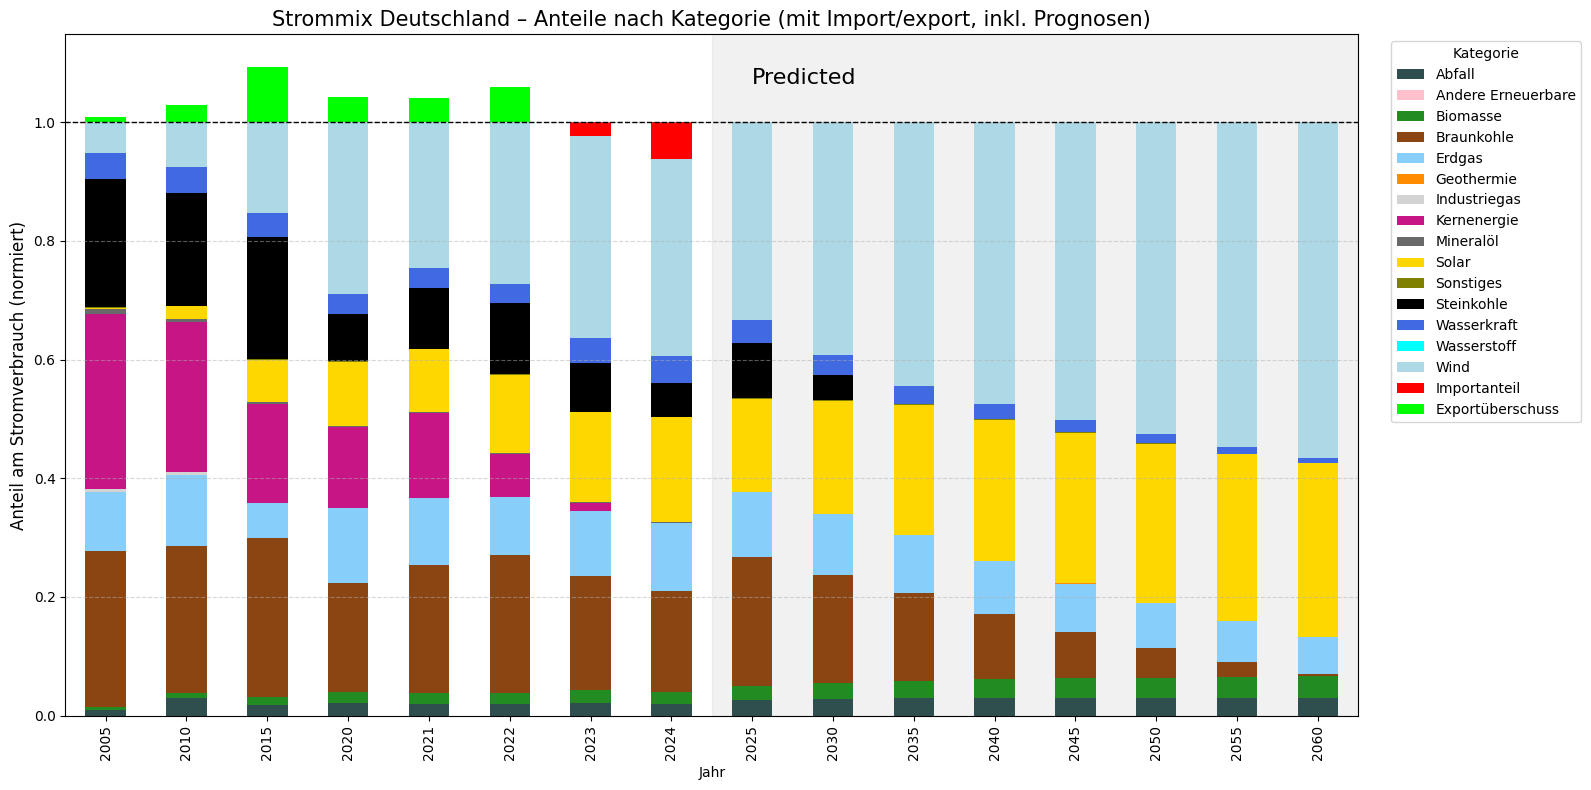

In [19]:
target_years = [2005, 2010, 2015, 2020, 2021, 2022, 2023, 2024, 2025, 2030, 2035, 2040, 2045, 2050, 2055, 2060]

# Helper func
def shade_forecast_area(ax, forecast_start_year=2025, color='lightgray', alpha=0.3, label="Predicted"):
    """
    Shade the forecast area starting from forecast_start_year on a bar plot.
    
    Parameters:
    - ax: matplotlib Axes object
    - forecast_start_year: int, first year of forecast
    - color: background color
    - alpha: transparency
    - label: optional text label to display
    """

    bar_centers = []
    seen_x_positions = set()

    for patch in ax.patches:
        try:
            x = patch.get_x()
            width = patch.get_width()
            x_center = x + width / 2

            if x_center not in seen_x_positions:
                bar_centers.append(x_center)
                seen_x_positions.add(x_center)
        except AttributeError:
            # ignore polygons without get_x()
            continue

    # Map bar_centers to years
    try:
        bar_years = [int(label.get_text()) for label in ax.get_xticklabels()]
    except:
        bar_years = list(range(len(bar_centers)))

    year_to_center = dict(zip(bar_years, bar_centers))

    if forecast_start_year in year_to_center:
        start_forecast = year_to_center[forecast_start_year] - 0.5
        ax.axvspan(
            start_forecast, ax.get_xlim()[1],
            color=color, alpha=alpha, zorder=0
        )

        if label:
            ax.text(
                start_forecast + 0.5,
                ax.get_ylim()[1] * 0.95,
                label,
                verticalalignment='top',
                horizontalalignment='left',
                fontsize=16,
                color='black'
            )



## ---


# Prepare production data (historical + forecast)
prod_combined = combined[combined['Kategorie'].isin(include_kategorien)].copy()
prod_combined["Jahr"] = prod_combined["ds"].dt.year
prod_combined = prod_combined[["Jahr", "Kategorie", "value", "Type"]]

# Historical Import/Export (2002–2024)
saldo_df = strommix_gesamt[strommix_gesamt["Typ"] == "Austauschsaldo"].copy()
saldo_df = saldo_df[(saldo_df["Jahr"] >= 2002) & (saldo_df["Jahr"] <= 2024)]
saldo_df = saldo_df[["Jahr", "Elektrizitätserzeugung (netto)"]].rename(columns={"Elektrizitätserzeugung (netto)": "Austauschsaldo"})

# Inlandsproduktion for historical years
historical_prod = prod_combined[prod_combined["Type"] == "Historisch"]
inlandsproduktion = historical_prod.groupby("Jahr")["value"].sum().reset_index().rename(columns={"value": "Inlandsproduktion"})

# Basis historical = production + saldo
basis = inlandsproduktion.merge(saldo_df, on="Jahr", how="left").fillna(0)

# Anteil berechnen für historische Daten
historical_merged = historical_prod.merge(basis, on="Jahr", how="left")
historical_merged["Anteil"] = historical_merged["value"] / (
    historical_merged["Inlandsproduktion"] + historical_merged["Austauschsaldo"].clip(lower=0)
)

# Forecast Anteile berechnen (ohne Import/Export)
forecast = prod_combined[prod_combined["Type"] == "Prognose"].copy()
forecast_total = forecast.groupby("Jahr")["value"].sum().reset_index().rename(columns={"value": "Inlandsproduktion"})
forecast = forecast.merge(forecast_total, on="Jahr")
forecast["Anteil"] = forecast["value"] / forecast["Inlandsproduktion"]

# Import/Export (nur historische Jahre)
import_df = basis[basis["Austauschsaldo"] > 0].copy()
import_df["Anteil"] = import_df["Austauschsaldo"] / (import_df["Inlandsproduktion"] + import_df["Austauschsaldo"])
import_df["Kategorie"] = "Importanteil"

export_df = basis[basis["Austauschsaldo"] < 0].copy()
export_df["Anteil"] = -export_df["Austauschsaldo"] / export_df["Inlandsproduktion"]
export_df["Kategorie"] = "Exportüberschuss"

# Combine all + filter to target_years
final_rel = pd.concat([
    historical_merged[["Jahr", "Kategorie", "Anteil"]],
    forecast[["Jahr", "Kategorie", "Anteil"]],
    import_df[["Jahr", "Kategorie", "Anteil"]],
    export_df[["Jahr", "Kategorie", "Anteil"]]
])
final_rel = final_rel[final_rel["Jahr"].isin(target_years)]

# Pivot für Stacked Bar Plot
pivot_plot = final_rel.pivot_table(
    index="Jahr",
    columns="Kategorie",
    values="Anteil",
    aggfunc="sum"
).fillna(0)

# Export/Import at end
cols = list(pivot_plot.columns)
for special in ["Importanteil", "Exportüberschuss"]:
    if special in cols:
        cols = [c for c in cols if c != special] + [special]
pivot_plot = pivot_plot[cols]

# Farben und Plot
tab20_colors = plt.get_cmap("tab20").colors
safe_colors = [c for i, c in enumerate(tab20_colors) if i not in [4,5,6]]
categories = list(pivot_plot.columns)

colors = [color_map.get(cat, "hotpink") for cat in categories]


# Plot
ax = pivot_plot.plot(
    kind="bar",
    stacked=True,
    figsize=(16, 8),
    color=colors
)

plt.axhline(1, color='black', linestyle='--', linewidth=1)
plt.title("Strommix Deutschland – Anteile nach Kategorie (mit Import/export, inkl. Prognosen)", fontsize=15)
plt.ylabel("Anteil am Stromverbrauch (normiert)", fontsize=12)
plt.xlabel("Jahr")
plt.legend(title="Kategorie", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.grid(axis='y', linestyle='--', alpha=0.5)

shade_forecast_area(ax)


plt.tight_layout()
plt.show()


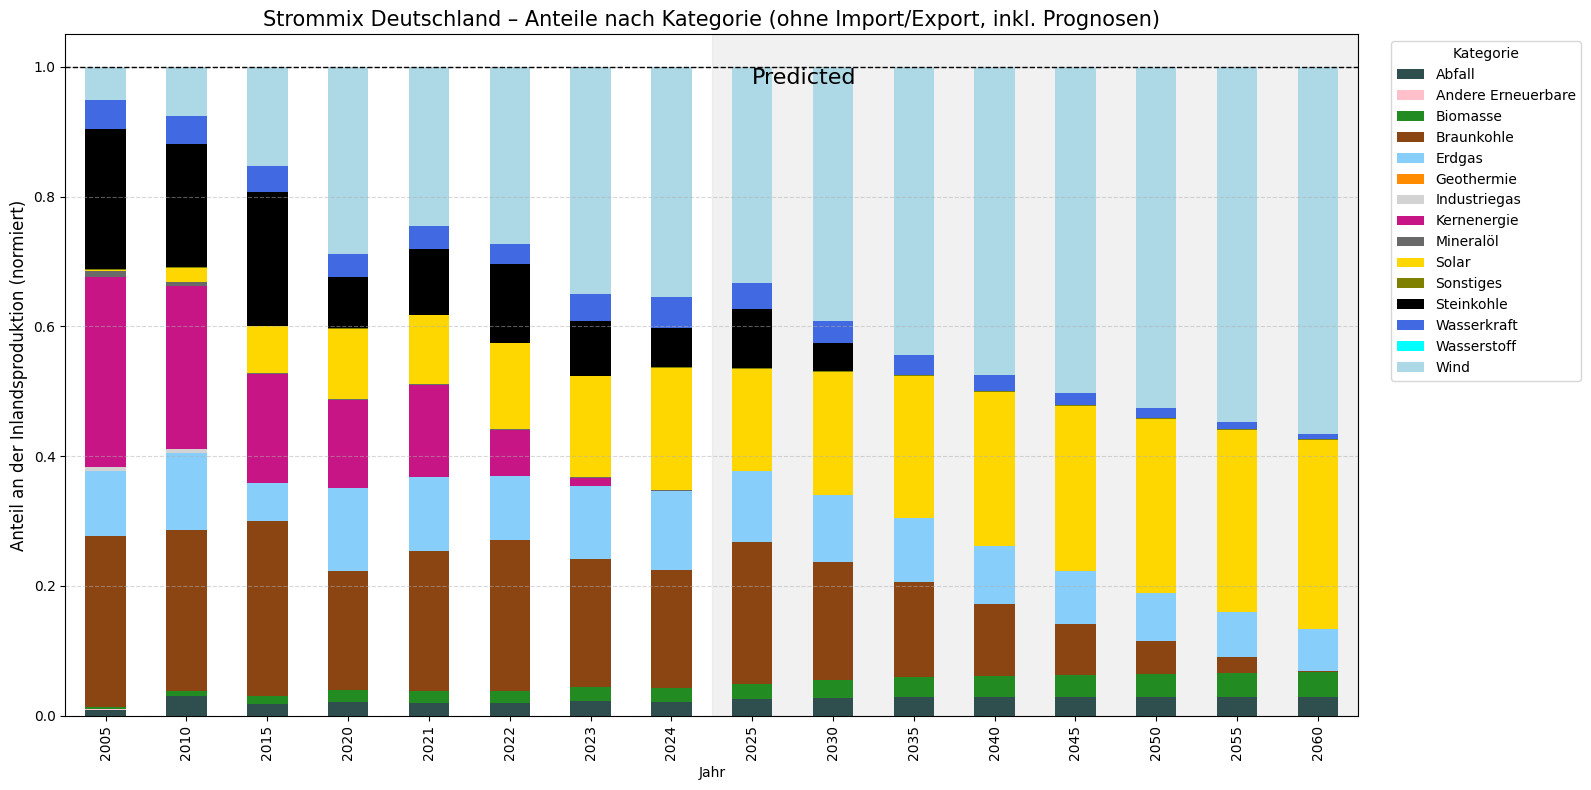

In [20]:
# New pivot without Importanteil / Exportüberschuss
pivot_plot_no_import = final_rel[
    ~final_rel["Kategorie"].isin(["Importanteil", "Exportüberschuss"])
].pivot_table(
    index="Jahr",
    columns="Kategorie",
    values="Anteil",
    aggfunc="sum"
).fillna(0)

# Normalize again (sum = 1.0 each year)
pivot_plot_no_import = pivot_plot_no_import.div(pivot_plot_no_import.sum(axis=1), axis=0)

# New category list
categories_no_import = list(pivot_plot_no_import.columns)

# Reuse color_map safely
colors_no_import = [color_map.get(cat, "hotpink") for cat in categories_no_import]

# Plot (no Import/Export)
ax = pivot_plot_no_import.plot(
    kind="bar",
    stacked=True,
    figsize=(16, 8),
    color=colors_no_import
)

plt.axhline(1, color='black', linestyle='--', linewidth=1)
plt.title("Strommix Deutschland – Anteile nach Kategorie (ohne Import/Export, inkl. Prognosen)", fontsize=15)
plt.ylabel("Anteil an der Inlandsproduktion (normiert)", fontsize=12)
plt.xlabel("Jahr")
plt.legend(title="Kategorie", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.grid(axis='y', linestyle='--', alpha=0.5)

shade_forecast_area(ax) 

plt.savefig(os.path.join(PLOT_DIR, "strommix_prognosen.png"), dpi=300, bbox_inches="tight")


plt.tight_layout()
plt.show()


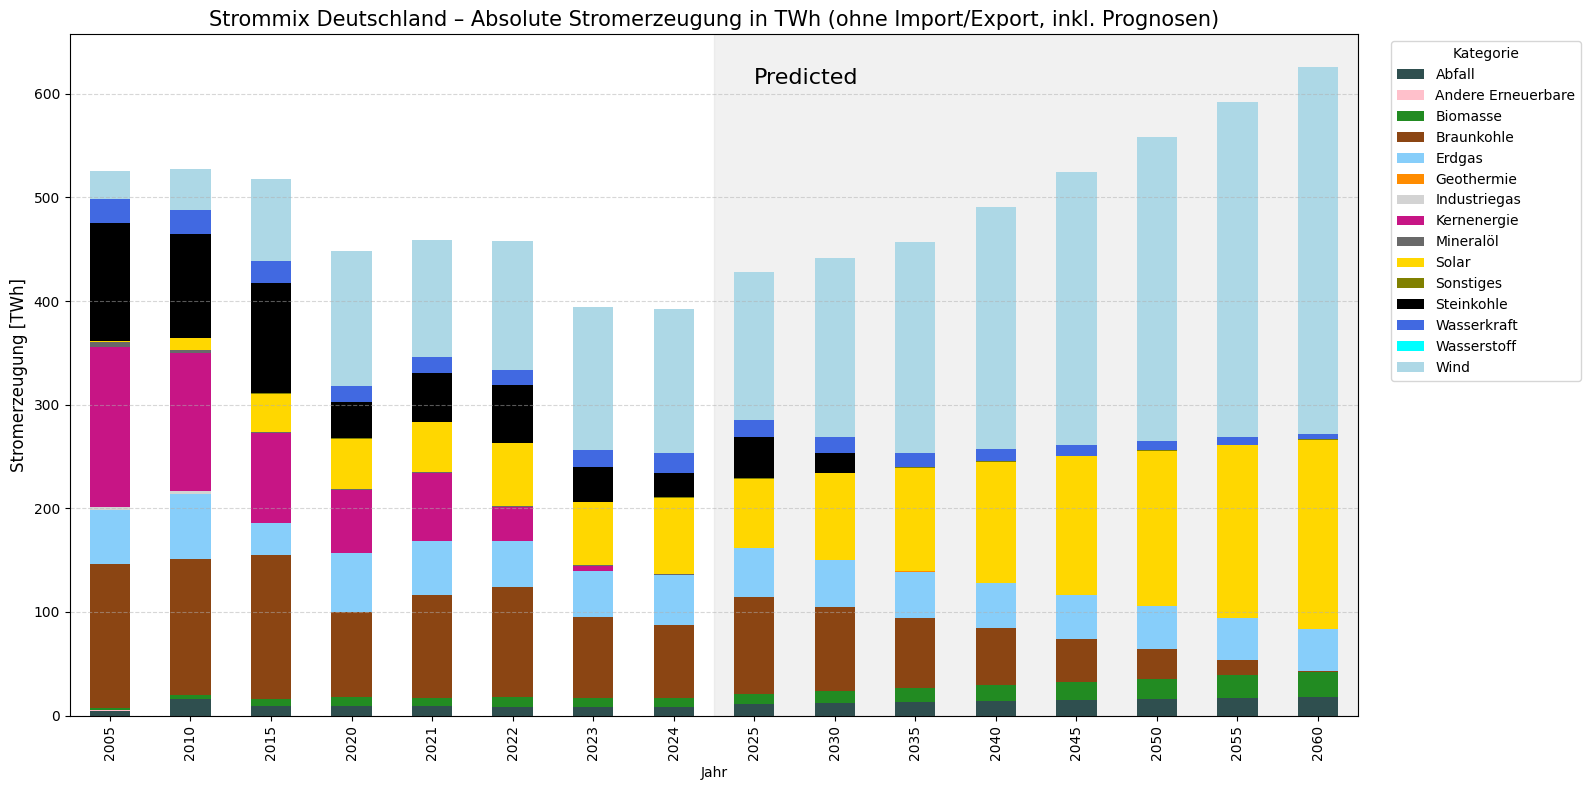

In [21]:
# Only use categories 
prod_absolute = combined[combined['Kategorie'].isin(include_kategorien)].copy()

# Convert MWh to TWh
prod_absolute["value"] = prod_absolute["value"] / 1_000_000  # MWh -> TWh

# Prepare absolute pivot table (no Import/Export)
prod_absolute["Jahr"] = prod_absolute["ds"].dt.year

pivot_absolute = prod_absolute[prod_absolute["Jahr"].isin(target_years)].pivot_table(
    index="Jahr",
    columns="Kategorie",
    values="value",
    aggfunc="sum"
).fillna(0)

# Sort years manually to match target_years
pivot_absolute = pivot_absolute.reindex(target_years)

# Define color order
categories_absolute = list(pivot_absolute.columns)
colors_absolute = [color_map.get(cat, "hotpink") for cat in categories_absolute]

# Create plot and capture ax
ax = pivot_absolute.plot(
    kind="bar",
    stacked=True,
    figsize=(16, 8),
    color=colors_absolute
)

# Standard labels
ax.set_title("Strommix Deutschland – Absolute Stromerzeugung in TWh (ohne Import/Export, inkl. Prognosen)", fontsize=15)
ax.set_ylabel("Stromerzeugung [TWh]", fontsize=12)
ax.set_xlabel("Jahr")
ax.legend(title="Kategorie", bbox_to_anchor=(1.02, 1), loc="upper left")
ax.grid(axis='y', linestyle='--', alpha=0.5)

shade_forecast_area(ax)

plt.savefig(os.path.join(PLOT_DIR, "strommix_prediction_abs.png"), dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()


In [22]:

# https://premise.readthedocs.io/en/latest/mapping.html
# MAPPINGS: https://github.com/polca/premise/blob/master/premise/iam_variables_mapping/electricity_variables.yaml

# Export

In [23]:
# Strommix ursprungliche Daten Export, ohne Prognose, Excel


# Pivot: Jahre = Zeilen, Kategorien = Spalten
strommix_wide = strommix_gesamt.pivot_table(
    index=["Kategorie", "Typ"],
    columns="Jahr",
    values="Elektrizitätserzeugung (netto)",
).fillna(0)

strommix_wide.insert(0, "Unit", "MWh")

# Index resetten für Export
strommix_wide = strommix_wide.reset_index()
with pd.ExcelWriter(f"{OUTPUT_DIR}/strommix_formatiert.xlsx", engine='xlsxwriter') as writer:
    strommix_wide.to_excel(writer, sheet_name='Strommix', index=False)

    workbook  = writer.book
    worksheet = writer.sheets['Strommix']

    # 1st column (JAHR)
    worksheet.set_column(0, 3, 16, workbook.add_format({
        'bold': True,
        'align': 'left'
    }))

    # Data columns
    worksheet.set_column(3, strommix_wide.shape[1], 20, workbook.add_format({
        'align': 'left'
    }))

    # Header formattierung
    header_format = workbook.add_format({'bold': True, 'bg_color': '#D9D9D9'})
    worksheet.set_row(0, 16, header_format)



strommix_wide.head(20)


Jahr,Kategorie,Typ,Unit,2002,2003,2004,2005,2006,2007,2008,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Abfall,"Abfall (Hausmüll, Industrie)",MWh,2926818.0,3182945.0,3094261.0,4524205.0,5523466.0,6398662.0,7049002.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Abfall,"Abfall (Hausmüll, Siedlungsabfälle)",MWh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8678621.0,9003436.0,9103612.0,9368342.0,8807724.0,8806724.0,8559383.0,8248923.0,8426706.0,8103057.0
2,Abfall,Abfall (Industrie),MWh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,822492.0,942120.0,864336.0,532107.0,546308.0,394625.0,375927.0,368800.0,337381.0,302544.0
3,Andere Erneuerbare,Sonstige erneuerbare Energien,MWh,243469.0,146692.0,193418.0,501970.0,364129.0,20829.0,434.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Biomasse,Biogas,MWh,30547.0,16499.0,18696.0,17191.0,10830.0,41389.0,56019.0,...,1656879.0,1730984.0,1757636.0,1776954.0,1909288.0,2177331.0,2305019.0,2662856.0,2628872.0,2564677.0
5,Biomasse,Biomethan (Bioerdgas),MWh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,766717.0,786940.0,904378.0,1036391.0,1007771.0,936420.0,868105.0
6,Biomasse,Deponiegas,MWh,110551.0,118181.0,180303.0,201636.0,183550.0,169709.0,153170.0,...,83700.0,72410.0,67784.0,53825.0,54243.0,70880.0,62707.0,56080.0,53592.0,58672.0
7,Biomasse,Feste biogene Stoffe,MWh,201651.0,255228.0,675774.0,1542493.0,1726401.0,2100075.0,2635180.0,...,4376181.0,4682300.0,4703454.0,4621836.0,4365482.0,4441567.0,4215786.0,4555379.0,4314766.0,4074438.0
8,Biomasse,Flüssige biogene Stoffe,MWh,0.0,0.0,0.0,17864.0,36419.0,57463.0,52248.0,...,890.0,0.0,1013.0,0.0,0.0,3449.0,0.0,0.0,0.0,0.0
9,Biomasse,Grubengas,MWh,215765.0,286779.0,313046.0,377588.0,488123.0,501313.0,387442.0,...,0.0,134240.0,78413.0,138398.0,82699.0,716510.0,606925.0,577320.0,501442.0,486810.0


In [24]:
strommix_grouped = strommix_wide.drop(columns=["Typ", "Unit"]).groupby("Kategorie").sum()
strommix_grouped = strommix_grouped.reset_index()


with pd.ExcelWriter(f"{OUTPUT_DIR}/strommix_grouped.xlsx", engine='xlsxwriter', mode='w') as writer:
    strommix_grouped.to_excel(writer, sheet_name='Strommix_Gruppiert', index=False)

    workbook  = writer.book
    worksheet = writer.sheets['Strommix_Gruppiert']

    worksheet.set_column(0, 0, 24, workbook.add_format({
        'bold': True,
        'align': 'left'
    }))

    worksheet.set_column(1, strommix_grouped.shape[1], 20, workbook.add_format({
        'align': 'left'
    }))

    # Header formatting
    header_format = workbook.add_format({'bold': True, 'bg_color': '#D9D9D9'})
    worksheet.set_row(0, 16, header_format)

strommix_grouped

Jahr,Kategorie,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Abfall,2926818.0,3182945.0,3094261.0,4524205.0,5523466.0,6398662.0,7049002.0,14566684.0,16040358.0,...,9501113.0,9945556.0,9967948.0,9900449.0,9354032.0,9201349.0,8935310.0,8617723.0,8764087.0,8405601.0
1,Andere Erneuerbare,243469.0,146692.0,193418.0,501970.0,364129.0,20829.0,434.0,426.0,442.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Biomasse,621788.0,782176.0,1345490.0,2333303.0,2661229.0,3032292.0,3442202.0,3714519.0,4165503.0,...,6303475.0,6793741.0,6747974.0,7656094.0,7299762.0,8443037.0,8420038.0,9043462.0,8568157.0,8253909.0
3,Braunkohle,142590854.0,142681785.0,142601680.0,138432054.0,135329507.0,138842011.0,134882315.0,131178803.0,130478772.0,...,139425488.0,134885571.0,133983434.0,131497568.0,101924390.0,82127603.0,99369899.0,105954959.0,77586126.0,71076760.0
4,Erdgas,39983110.0,44973722.0,44882447.0,52311880.0,54957743.0,56256917.0,66936720.0,57599018.0,63091306.0,...,30123232.0,46503022.0,48956363.0,44533130.0,52899669.0,57096199.0,51795658.0,45163692.0,44255013.0,47744737.0
5,Export,44463109.0,52379313.0,50807677.0,61427462.0,65441212.0,62508209.0,61769946.0,54132291.0,57917220.0,...,85290316.0,78862663.0,80301486.0,80462299.0,72792688.0,66930968.0,70305524.0,76586091.0,60082790.0,55389299.0
6,Geothermie,0.0,0.0,0.0,0.0,0.0,0.0,12078.0,9482.0,11858.0,...,91532.0,152650.0,147306.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Import,51091111.0,49109749.0,48186394.0,56862291.0,48464084.0,45953131.0,41670469.0,41859300.0,42961985.0,...,37007698.0,28337841.0,27842337.0,31726919.0,40125396.0,48046985.0,51731791.0,49330582.0,69306080.0,81658124.0
8,Import/Export,6628002.0,-3269564.0,-2621283.0,-4565171.0,-16977128.0,-16555078.0,-20099477.0,-12272991.0,-14955235.0,...,-48282616.0,-50524820.0,-52459764.0,-48717723.0,-32668719.0,-18880474.0,-18580816.0,-27026898.0,9175369.0,26323839.0
9,Industriegas,3391990.0,3818795.0,3720766.0,3039862.0,2907267.0,3345373.0,2820119.0,1651579.0,2915181.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,162.0,0.0,0.0


In [28]:
combined_wide_excel = combined.pivot_table(
    index="Kategorie",
    columns="Year",
    values="value",
    aggfunc="sum"
).fillna(0)

# Unit-Spalte hinzufügen
combined_wide_excel.insert(0, "Unit", "MWh")

# Index resetten für Export
combined_wide_excel = combined_wide_excel.reset_index()

# Exportieren ins gleiche Excel File mit Formatierung
with pd.ExcelWriter(f"{OUTPUT_DIR}/strommix_prognose_absolute.xlsx", engine='xlsxwriter', mode='w') as writer:
    combined_wide_excel.to_excel(writer, sheet_name='Strommix_Prognose', index=False)

    workbook  = writer.book
    worksheet = writer.sheets['Strommix_Prognose']

    # Format: erste Spalten ('Kategorie' und 'Unit')
    worksheet.set_column(0, 1, 24, workbook.add_format({
        'bold': True,
        'align': 'left'
    }))

    # Daten-Spalten (Jahre)
    worksheet.set_column(2, combined_wide_excel.shape[1], 20, workbook.add_format({
        'align': 'left'
    }))

    # Header-Format
    header_format = workbook.add_format({'bold': True, 'bg_color': '#D9D9D9'})
    worksheet.set_row(0, 16, header_format)

combined_wide_excel

Year,Kategorie,Unit,2002,2003,2004,2005,2006,2007,2008,2009,...,2023,2024,2025,2030,2035,2040,2045,2050,2055,2060
0,Abfall,MWh,2926818.0,3182945.0,3094261.0,4524205.0,5523466.0,6398662.0,7049002.0,14566684.0,...,8764087.0,8405601.0,1.116449e+07,1.219321e+07,1.322193e+07,1.425065e+07,1.527993e+07,1.630865e+07,1.733736e+07,1.836608e+07
1,Andere Erneuerbare,MWh,243469.0,146692.0,193418.0,501970.0,364129.0,20829.0,434.0,426.0,...,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,Biomasse,MWh,621788.0,782176.0,1345490.0,2333303.0,2661229.0,3032292.0,3442202.0,3714519.0,...,8568157.0,8253909.0,9.835276e+06,1.176334e+07,1.369141e+07,1.561948e+07,1.754861e+07,1.947668e+07,2.140474e+07,2.333281e+07
3,Braunkohle,MWh,142590854.0,142681785.0,142601680.0,138432054.0,135329507.0,138842011.0,134882315.0,131178803.0,...,77586126.0,71076760.0,9.359909e+07,8.047807e+07,6.735704e+07,5.423601e+07,4.110780e+07,2.798677e+07,1.486575e+07,1.744721e+06
4,Erdgas,MWh,39983110.0,44973722.0,44882447.0,52311880.0,54957743.0,56256917.0,66936720.0,57599018.0,...,44255013.0,47744737.0,4.674384e+07,4.574316e+07,4.474249e+07,4.374182e+07,4.274060e+07,4.173993e+07,4.073926e+07,3.973858e+07
5,Geothermie,MWh,0.0,0.0,0.0,0.0,0.0,0.0,12078.0,9482.0,...,0.0,0.0,3.674068e+04,4.230763e+04,4.787457e+04,5.344152e+04,5.901151e+04,6.457845e+04,7.014540e+04,7.571234e+04
6,Industriegas,MWh,3391990.0,3818795.0,3720766.0,3039862.0,2907267.0,3345373.0,2820119.0,1651579.0,...,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
7,Kernenergie,MWh,156287021.0,156455841.0,158378456.0,154612295.0,158710790.0,133229498.0,140710087.0,127690281.0,...,4996402.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
8,Mineralöl,MWh,1967059.0,2690482.0,3334153.0,4313808.0,3333899.0,2470751.0,2637131.0,3197814.0,...,754455.0,677781.0,1.226912e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
9,Solar,MWh,200000.0,300000.0,600000.0,1300000.0,2200000.0,3100000.0,4400000.0,6600000.0,...,61100000.0,74100000.0,6.715822e+07,8.368557e+07,1.002129e+08,1.167403e+08,1.332767e+08,1.498040e+08,1.663314e+08,1.828587e+08


In [41]:
# Copy the formatted wide DataFrame with values per year
strommix_percent = combined_wide_excel.copy()

# Remove non-numeric columns for percentage calculation
categories_only = strommix_percent.drop(columns=["Kategorie", "Unit"])

# Calculate column-wise (i.e., per year) percentages
percentages = categories_only.div(categories_only.sum(axis=0), axis=1) 

# Re-add metadata columns
strommix_percent = pd.concat([combined_wide_excel[["Kategorie", "Unit"]], percentages], axis=1)
strommix_percent["Unit"] = "%"
strommix_percent.iloc[:, 2:] = strommix_percent.iloc[:, 2:].round(4)


with pd.ExcelWriter(f"{OUTPUT_DIR}/strommix_prognose_relative.xlsx", engine='xlsxwriter', mode='w') as writer:
    strommix_percent.to_excel(writer, sheet_name='Strommix_Prozent', index=False)

    workbook  = writer.book
    worksheet = writer.sheets['Strommix_Prozent']

    # Format first columns ('Kategorie' and 'Unit')
    worksheet.set_column(0, 1, 24, workbook.add_format({
        'bold': True,
        'align': 'left'
    }))

    # Data columns (Jahre) as percentage
    percent_format = workbook.add_format({'num_format': '0.00%', 'align': 'left'})
    worksheet.set_column(2, strommix_percent.shape[1], 12, percent_format)

    # Header formatting
    header_format = workbook.add_format({'bold': True, 'bg_color': '#D9D9D9'})
    worksheet.set_row(0, 16, header_format)


strommix_percent

Year,Kategorie,Unit,2002,2003,2004,2005,2006,2007,2008,2009,...,2023,2024,2025,2030,2035,2040,2045,2050,2055,2060
0,Abfall,%,0.0059,0.0062,0.0059,0.0086,0.0103,0.0121,0.0132,0.0292,...,0.0222,0.0214,0.0261,0.0276,0.0290,0.0291,0.0291,0.0292,0.0293,0.0293
1,Andere Erneuerbare,%,0.0005,0.0003,0.0004,0.0010,0.0007,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,Biomasse,%,0.0012,0.0015,0.0026,0.0044,0.0050,0.0057,0.0065,0.0075,...,0.0217,0.0210,0.0230,0.0267,0.0300,0.0319,0.0335,0.0349,0.0362,0.0373
3,Braunkohle,%,0.2854,0.2760,0.2718,0.2633,0.2518,0.2616,0.2530,0.2632,...,0.1969,0.1813,0.2187,0.1823,0.1476,0.1106,0.0784,0.0501,0.0251,0.0028
4,Erdgas,%,0.0800,0.0870,0.0856,0.0995,0.1023,0.1060,0.1256,0.1155,...,0.1123,0.1218,0.1092,0.1036,0.0980,0.0892,0.0815,0.0748,0.0688,0.0635
5,Geothermie,%,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
6,Industriegas,%,0.0068,0.0074,0.0071,0.0058,0.0054,0.0063,0.0053,0.0033,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
7,Kernenergie,%,0.3128,0.3026,0.3019,0.2941,0.2953,0.2510,0.2639,0.2562,...,0.0127,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,Mineralöl,%,0.0039,0.0052,0.0064,0.0082,0.0062,0.0047,0.0049,0.0064,...,0.0019,0.0017,0.0003,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
9,Solar,%,0.0004,0.0006,0.0011,0.0025,0.0041,0.0058,0.0083,0.0132,...,0.1551,0.1890,0.1569,0.1896,0.2195,0.2381,0.2542,0.2684,0.2809,0.2921


In [ ]:
# Export predictions for Premise, scenario 2, all predicted data

# CONFIG
# kategorie_to_variable = {
#     "Abfall": "Electricity generation|Wastes",  # Aggregated
#     "Biomasse": "Electricity generation|Biomass",  # Top-level
#     "Braunkohle": "Electricity generation|Coal|Fossil|Lignite",  
#     "Erdgas": "Electricity generation|Gas|Fossil gases",  
#     "Geothermie": "Electricity generation|Geothermal",  
#     "Industriegas": "Electricity generation|Gas|Fossil gases|Industrial CHPs gas",  
#     "Kernenergie": "Electricity generation|Nuclear Fuel|Nuclear power plants",
#     "Mineralöl": "Electricity generation|Oil|Fossil liquids",  
#     "Solar": "Electricity generation|Solar",  
#     "Sonstiges": "Electricity generation|Other",  
#     "Steinkohle": "Electricity generation|Coal|Fossil|Hard coal",  
#     "Wasserkraft": "Electricity generation|Hydro",  
#     "Wind": "Electricity generation|Wind" ,
#     "Wasserstoff": "Electricity generation|Hydrogen", # todo to be added
# }

kategorie_to_variable = {
    "Abfall": "Electricity|Production|Waste",                    # closest fit
    "Biomasse": "Electricity|Production|Biomass",
    "Braunkohle": "Electricity|Production|Coal",                 # REMIND doesn't split hard/lignite
    "Steinkohle": "Electricity|Production|Coal",
    "Erdgas": "Electricity|Production|Gas",
    "Industriegas": "Electricity|Production|Gas",                # industrial CHP gas assumed to feed into grid
    "Kernenergie": "Electricity|Production|Nuclear",
    "Mineralöl": "Electricity|Production|Oil",
    "Solar": "Electricity|Production|Solar",
    "Wind": "Electricity|Production|Wind",
    "Wasserkraft": "Electricity|Production|Hydro",
    "Geothermie": "Electricity|Production|Geothermal",
    "Wasserstoff": "Electricity|Production|Hydrogen",           # not in REMIND by default, but safe fallback
    "Sonstiges": "Electricity|Production|Other"                 # catch-all (maps to synthetic or unspecified)
}


target_years = [2005, 2010, 2015, 2020, 2025, 2030, 2035, 2040, 2045, 2050, 2055, 2060]

# Step 1: Filter combined dataset
df_filtered = combined[combined['ds'].dt.year.isin(target_years)].copy()

# Convert MWh to PJ
df_filtered['PJ'] = df_filtered['value'] * 3.6 / 1_000_000
df_filtered['year'] = df_filtered['ds'].dt.year

# Map Kategorie -> IAM variable name
df_filtered['variable'] = df_filtered['Kategorie'].map(kategorie_to_variable)

# Drop rows with unmapped variables (optional safety)
df_filtered = df_filtered.dropna(subset=['variable'])

# Step 2: Pivot to wide format
pivot = df_filtered.pivot_table(
    index="variable",
    columns="year",
    values="PJ",
    aggfunc="sum"
).reset_index()

# Add SWEET/Premise metadata columns
pivot["scenario"] = "Base"
pivot["region"] = "DE"
pivot["unit"] = "PJ/yr."
pivot["model"] = "DE_GRIDMIX_PREDICTED"

# Reorder columns to match SWEET structure
export_columns = ["model", "scenario", "region", "variable", "unit"] + target_years
final_export = pivot[export_columns]

# Export to CSV
final_export.to_csv(f"{OUTPUT_DIR}/DE_GRIDMIX_SCENARIO_02_PREDICTIONS.csv", index=False)


final_export.head(20)